## Stores Sales Prediction



#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data
- The data consists of 12 column and 8523 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [994]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [995]:
df = pd.read_csv('C:\\Users\\breva\\Downloads\\Compressed\\archive\\Train.csv')

#### Show Top 5 Records

In [996]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [997]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

#### Shape of the dataset

In [998]:
df.shape

(8523, 12)

### 2.2 Dataset information

- Item_Identifier: Unique product ID  
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [999]:
df['Item_Visibility'] = df['Item_Visibility']*100

In [1000]:
df['Item_Visibility'].median()


5.3930934

In [1001]:
df = df.replace(0.000000, 5.3930934)


In [1002]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,5.393093,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,5.393093,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [1003]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1004]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Item_Weight 0.1717  % missing values
Outlet_Size 0.2828  % missing values


 
#### Since there are two missing values, we need to find the relationship between missing values and Item_Outlet_Sales               
#### Let's plot some diagram for this relationship

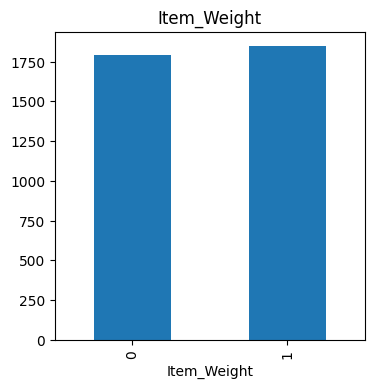

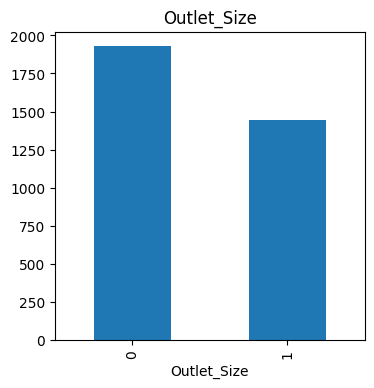

In [1005]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean 'Item_Outlet_Sales' where the information is missing or present
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar(figsize=(4, 4))
    plt.title(feature)
    plt.show()
    

### Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values. So we have to check the dataset has outliers for imputing the nan values to the numerical feature. 

### CHECKING OUTLIERS FOR THE NUMERICAL CONTINOUS FEATURE (Item_Weight)

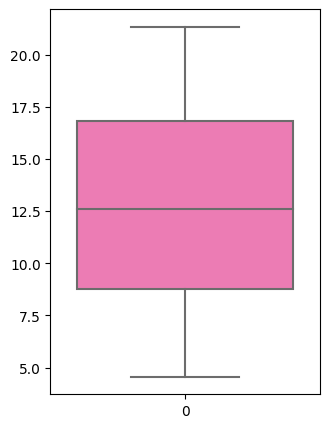

In [1006]:
plt.subplots(1,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Item_Weight'],color='hotpink')
plt.show()

### From the above boxplot there are no outliers in the Item_weight feature. So, the mean value of the Item_weight feature is imputed in the missing cell of the Item_weight feature.

### Handling numerical variables that contains missing values

In [1007]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [1008]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Categorical variable that contains missing values

In [1009]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [1010]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [1011]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 3.2 Check Duplicates

In [1012]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [1013]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 3.4 Checking the number of unique values of each column

In [1014]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7879
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [1015]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [1016]:

continuous_feature=[feature for feature in df.columns if df[feature].dtypes != 'O' and df[feature].dtypes != 'int64']
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [1017]:
df1 = df[continuous_feature]

In [1018]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,1.604730,249.8092,3735.1380
1,5.920,1.927822,48.2692,443.4228
2,17.500,1.676007,141.6180,2097.2700
3,19.200,5.393093,182.0950,732.3800
4,8.930,5.393093,53.8614,994.7052
...,...,...,...,...
8518,6.865,5.678339,214.5218,2778.3834
8519,8.380,4.698243,108.1570,549.2850
8520,10.600,3.518627,85.1224,1193.1136
8521,7.210,14.522065,103.1332,1845.5976


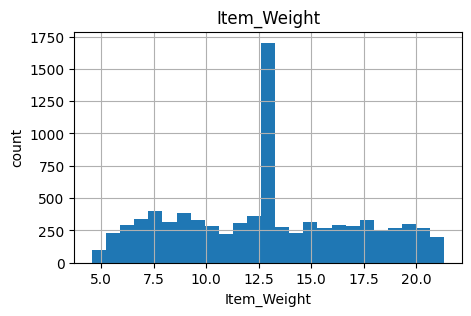

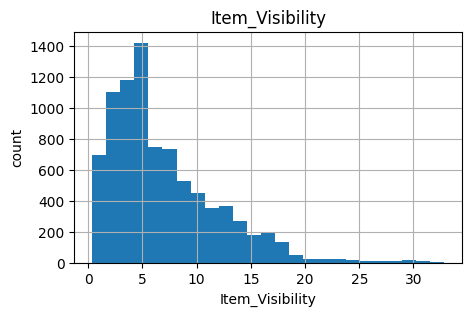

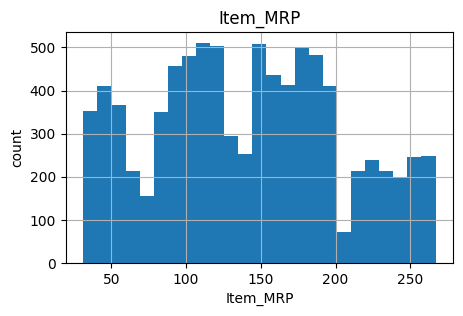

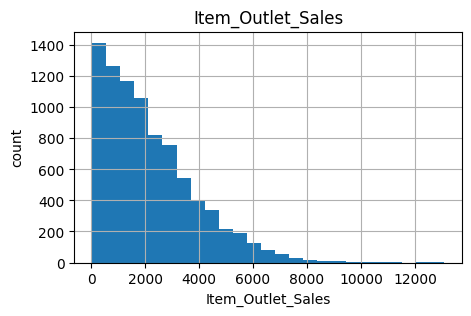

In [1019]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df1.copy()
    data[feature].hist(bins=25, figsize=(5, 3))
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

### Outliers

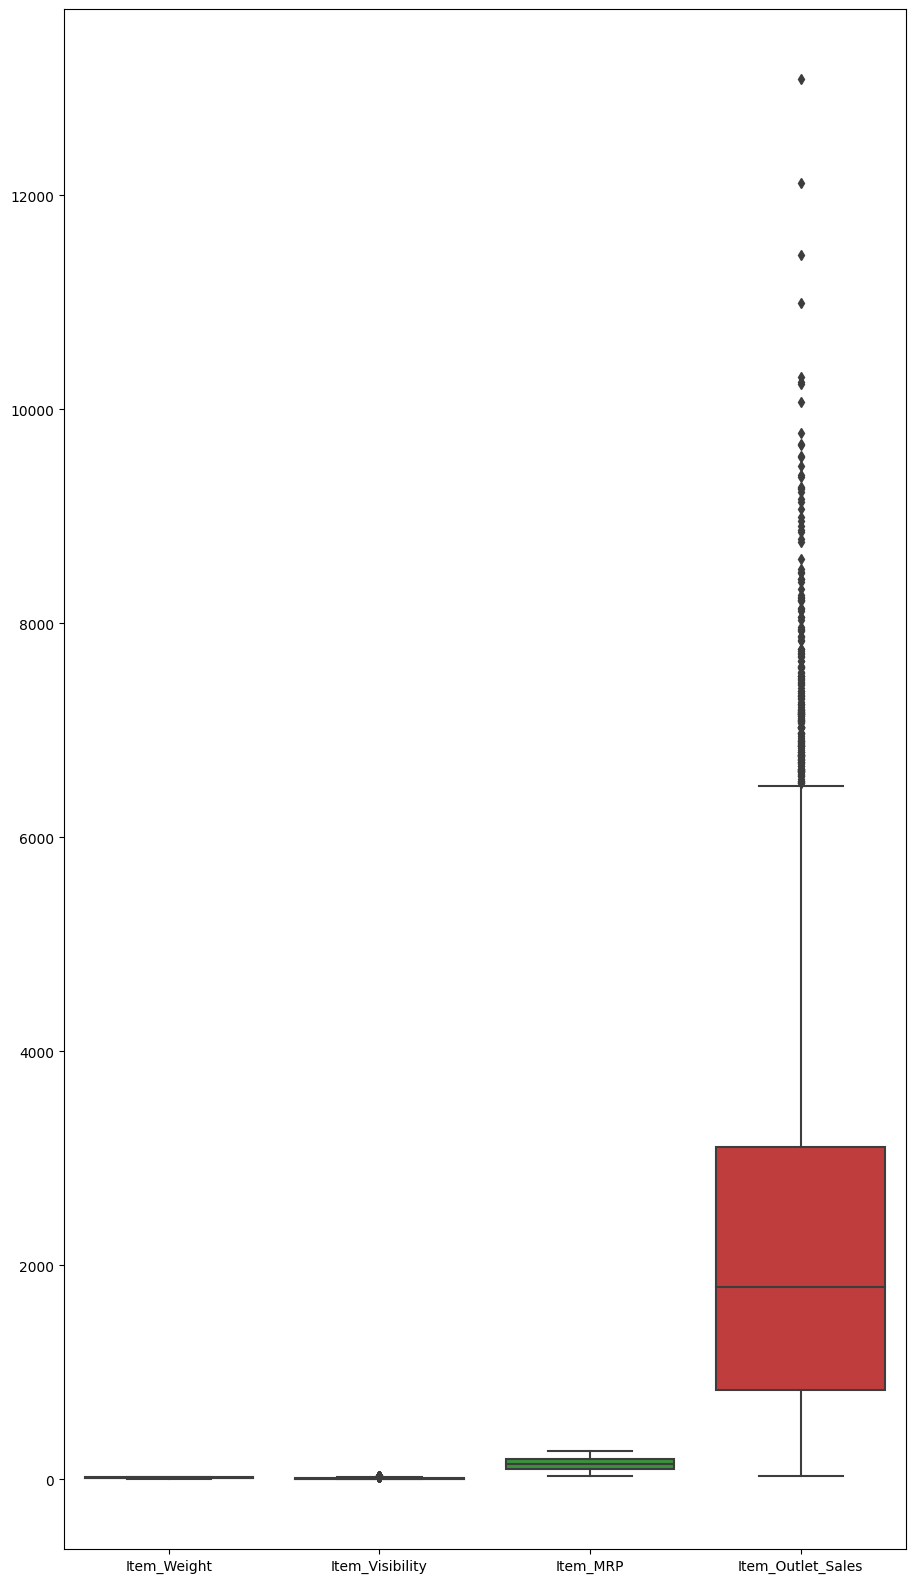

In [1020]:
plt.subplots(1,figsize=(50,20))
plt.subplot(141)
sns.boxplot(df1)
plt.show()

## Find out the relationship between categorical variable and dependent feature Item_Outlet_Sales

In [1021]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']



In [1022]:
categorical_features



['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

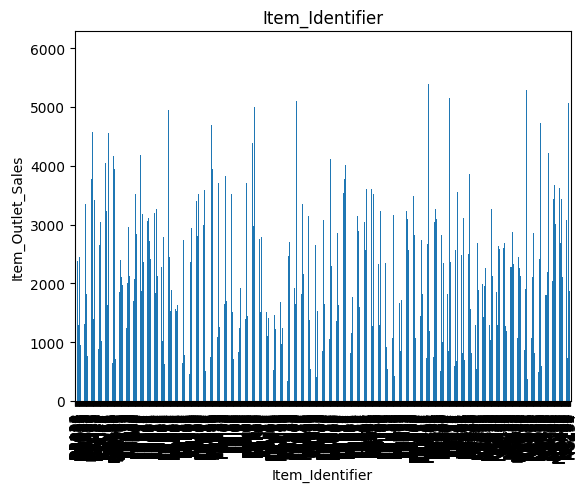

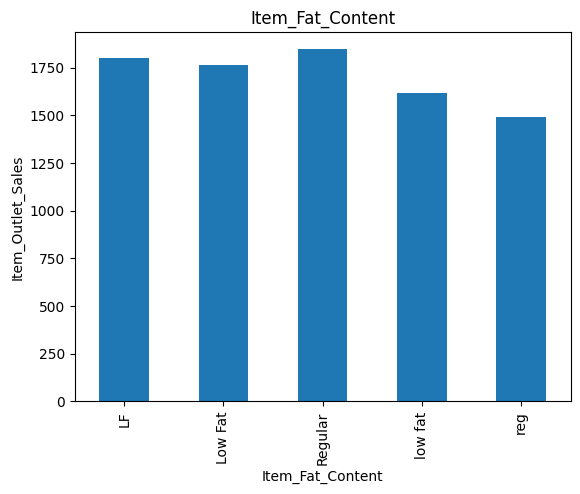

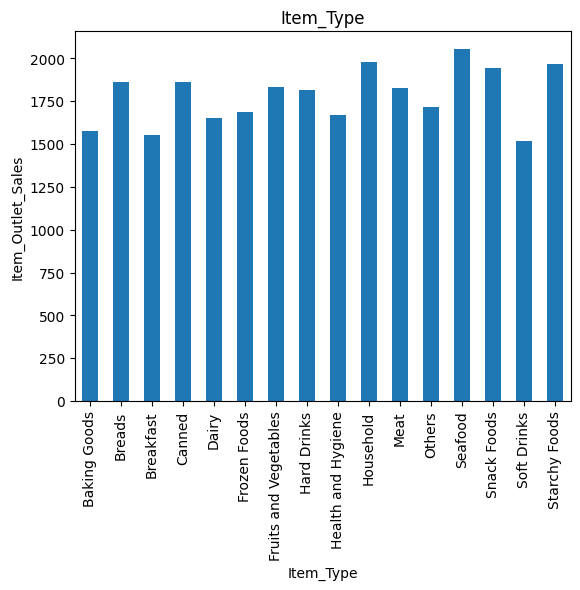

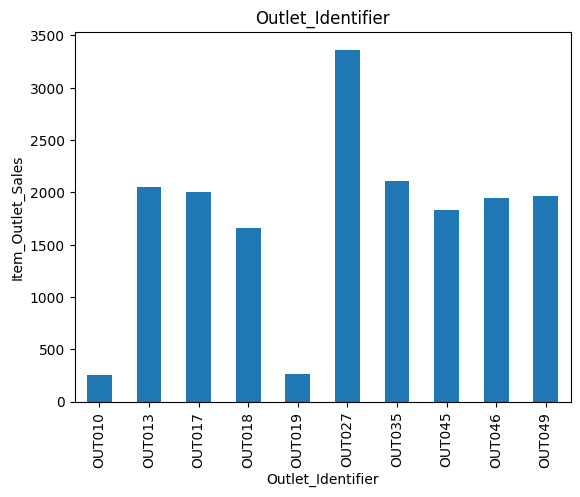

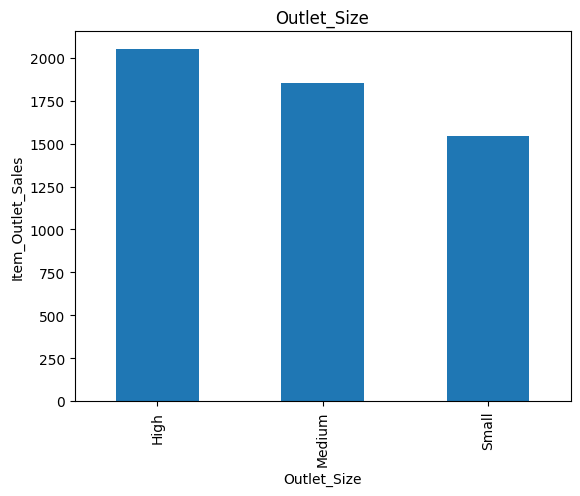

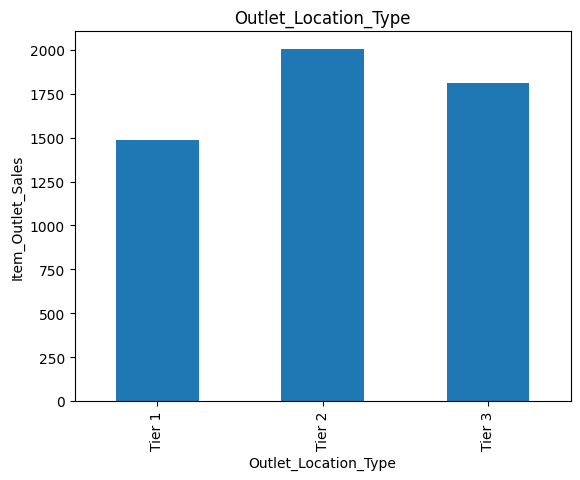

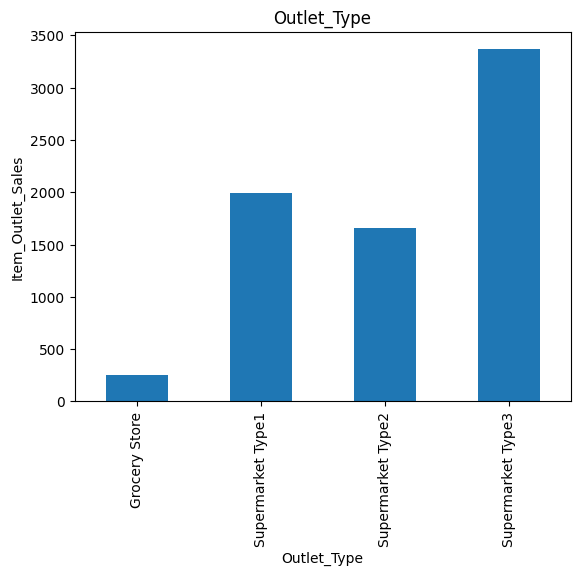

In [1023]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(feature)
    plt.show()

    

## There is no relationship between the Item_Identifier and  Item_Outlet_Sales. So dropping the Item_Identifier feature


In [1024]:

df = df[['Item_Weight', 'Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [1025]:
data_con=df1.copy()


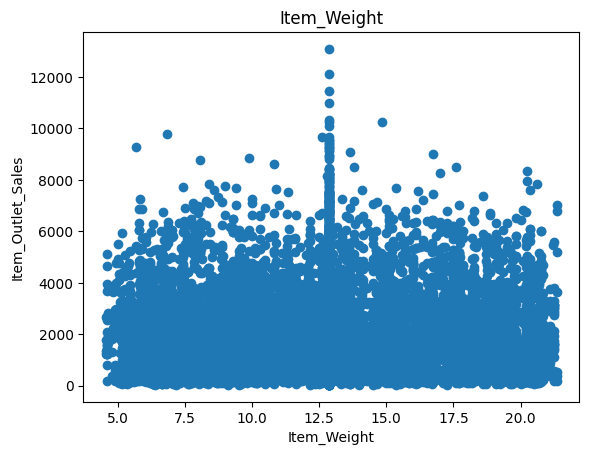

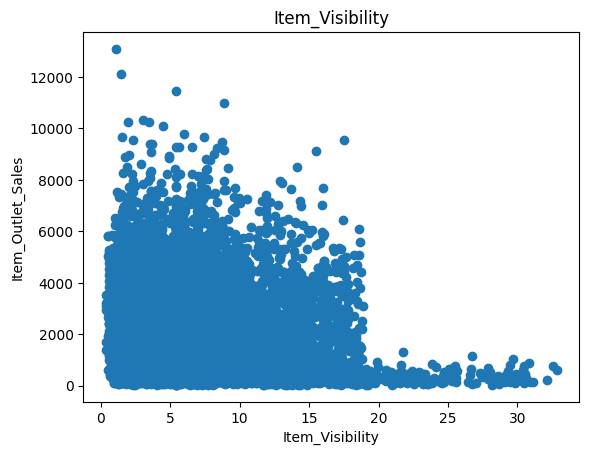

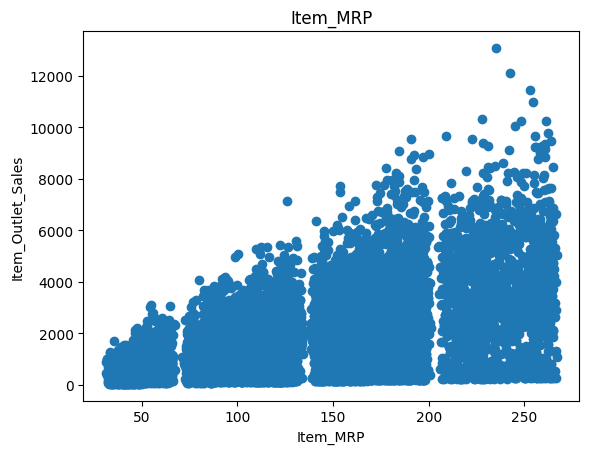

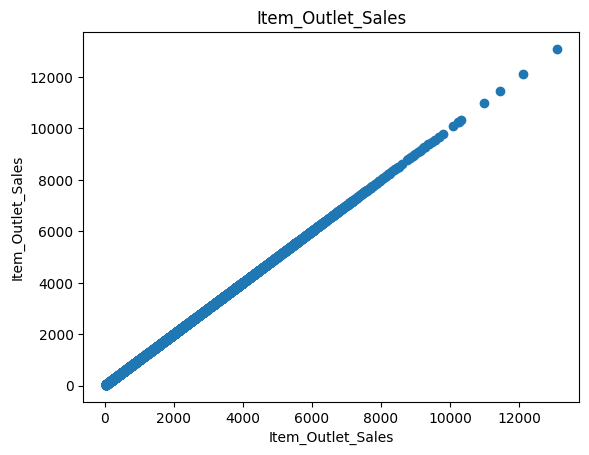

In [1026]:
for feature in continuous_feature:
    if 0 in data_con[feature].unique():
        pass
    else:
        plt.scatter(data_con[feature],data_con['Item_Outlet_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(feature)
        plt.show()

### Check statistics of data set

In [1027]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,6.946040,140.992782,1997.831867,2181.288914
std,4.226124,4.889278,62.275067,8.371760,1706.499616
min,4.555000,0.357470,31.290000,1985.000000,33.290000
25%,9.310000,3.308534,93.826500,1987.000000,834.247400
50%,12.857645,5.393093,143.012800,1999.000000,1794.331000
75%,16.000000,9.458529,185.643700,2004.000000,3101.296400
max,21.350000,32.839095,266.888400,2009.000000,13086.964800


#### Insight
- From above description of numerical data, all means are very far to each other;
- All standard deviations are very far;

#### So Standardization is reauired to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. 

#### z = (x-x_mean)/std

In [1028]:
from sklearn.preprocessing import StandardScaler


In [1029]:
scaler=StandardScaler()

df_scaled=scaler.fit_transform(df1)

In [1030]:
dfr = pd.DataFrame(df_scaled)

In [1031]:
dfr

,0,1,2,3
0,-0.841872,-1.092518,1.747454,0.910601
1,-1.641706,-1.026432,-1.489023,-1.018440
2,1.098554,-1.077939,0.010040,-0.049238
3,1.500838,-0.317641,0.660050,-0.849103
4,-0.929428,-0.317641,-1.399220,-0.695373
...,...,...,...,...
8518,-1.418084,-0.259297,1.180783,0.349915
8519,-1.059578,-0.459767,-0.527301,-0.956402
8520,-0.534243,-0.701047,-0.897208,-0.579100
8521,-1.336444,1.549609,-0.607977,-0.196725


In [1032]:
dfr = dfr.rename(columns={0: 'Item_Weight'})
dfr = dfr.rename(columns={1: 'Item_Visibility'})
dfr = dfr.rename(columns={2: 'Item_MRP'})
dfr = dfr.rename(columns={3: 'Item_Outlet_Sales'})


In [1033]:
dfr

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.841872,-1.092518,1.747454,0.910601
1,-1.641706,-1.026432,-1.489023,-1.018440
2,1.098554,-1.077939,0.010040,-0.049238
3,1.500838,-0.317641,0.660050,-0.849103
4,-0.929428,-0.317641,-1.399220,-0.695373
...,...,...,...,...
8518,-1.418084,-0.259297,1.180783,0.349915
8519,-1.059578,-0.459767,-0.527301,-0.956402
8520,-0.534243,-0.701047,-0.897208,-0.579100
8521,-1.336444,1.549609,-0.607977,-0.196725


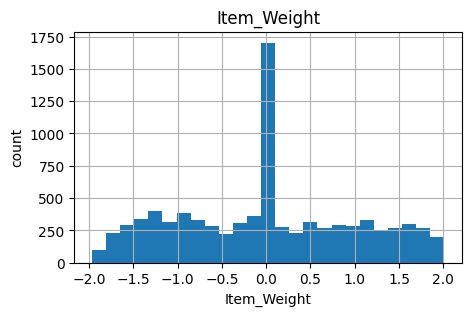

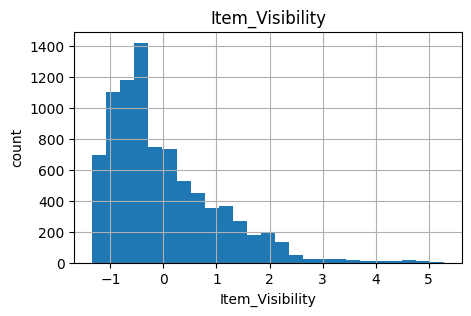

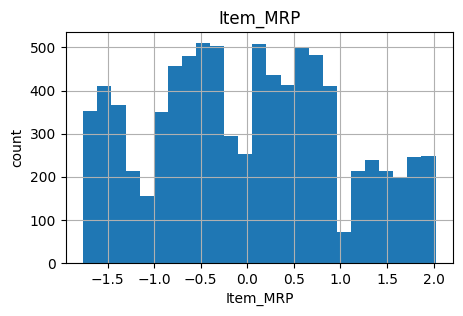

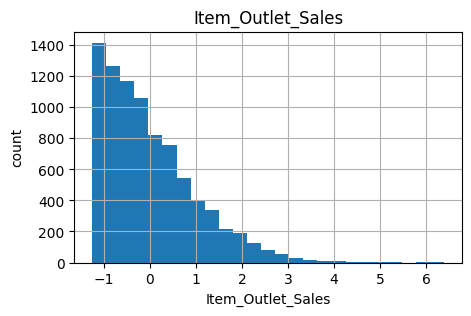

In [1034]:
for feature in continuous_feature:
    data2=dfr.copy()
    data2[feature].hist(bins=25, figsize=(5, 3))
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

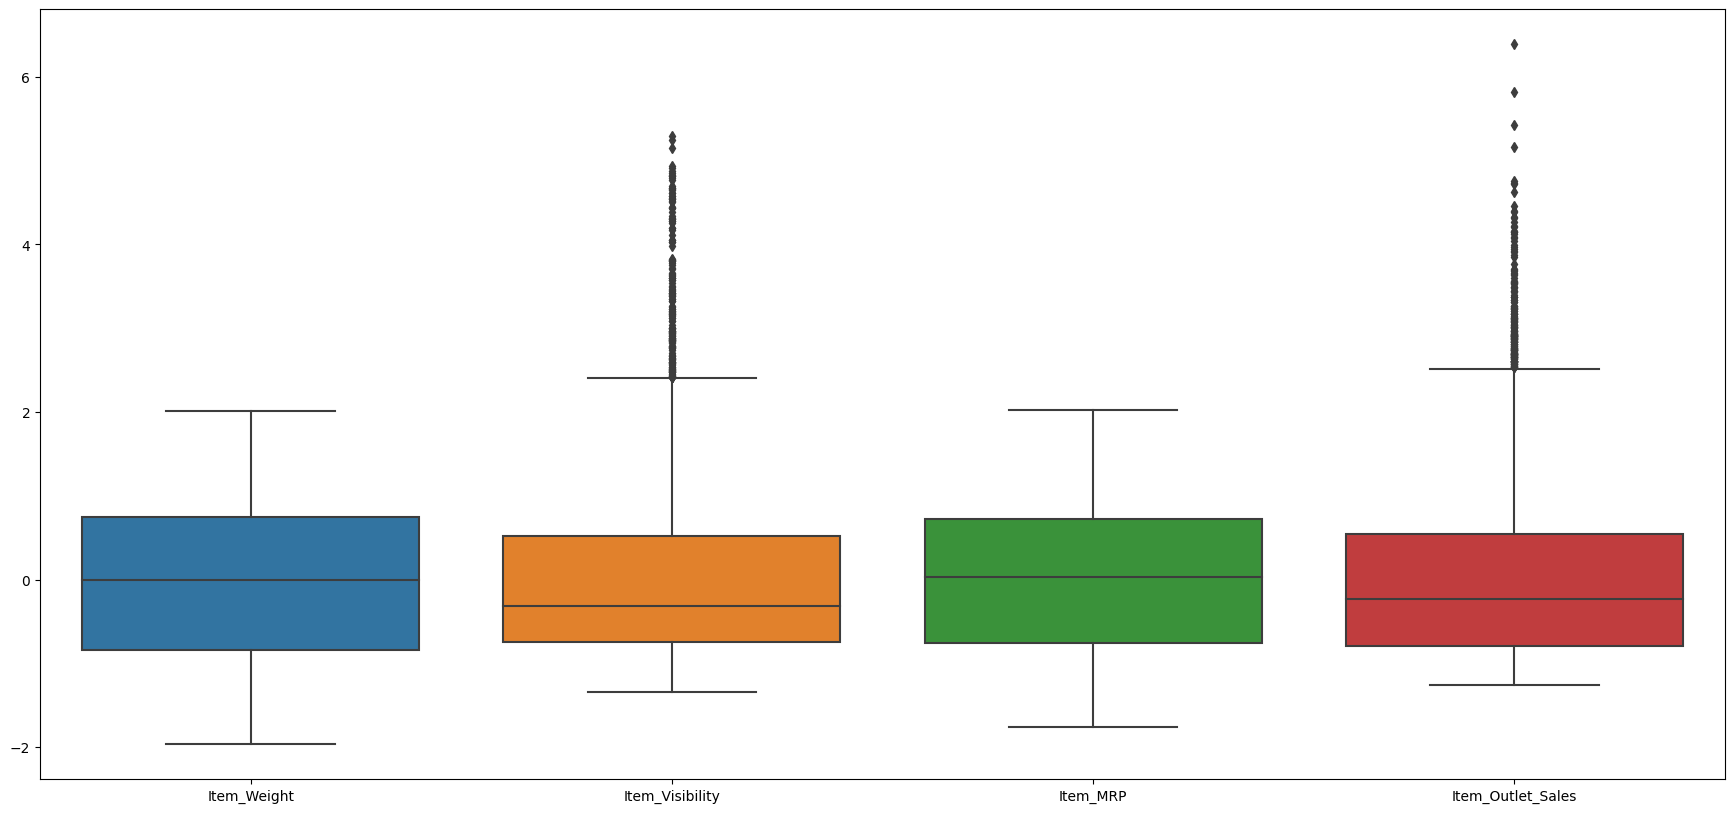

In [1035]:
plt.subplots(1,figsize=(100,10))
plt.subplot(141)
sns.boxplot(dfr)
plt.show()

##### Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9
1-10 precentile---10% of all values in this group is less than 1
4-40%

In [1036]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df_robust_scaler.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.531786,-0.615995,1.163142,0.856094
1,-1.037017,-0.563459,-1.031872,-0.595888
2,0.693924,-0.604405,-0.015191,0.133627
3,0.948035,0.000000,0.425652,-0.468429
4,-0.587092,0.000000,-0.970966,-0.352717


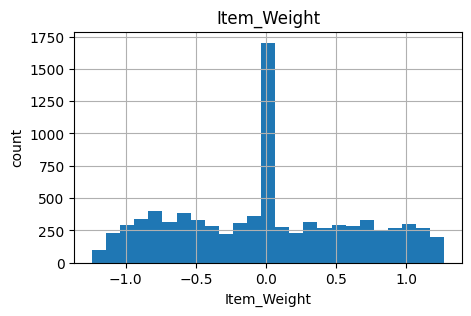

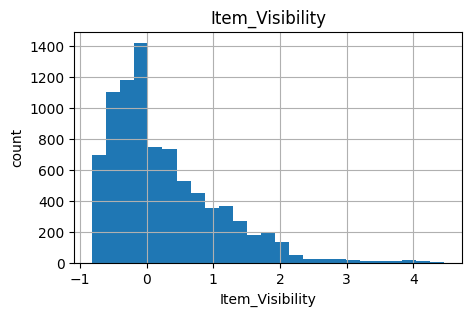

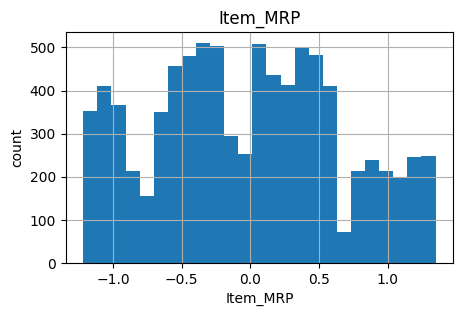

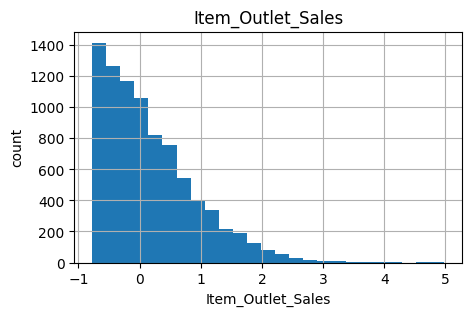

In [1037]:
for feature in continuous_feature:

    data3=df_robust_scaler.copy()
    data3[feature].hist(bins=25, figsize=(5, 3))
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

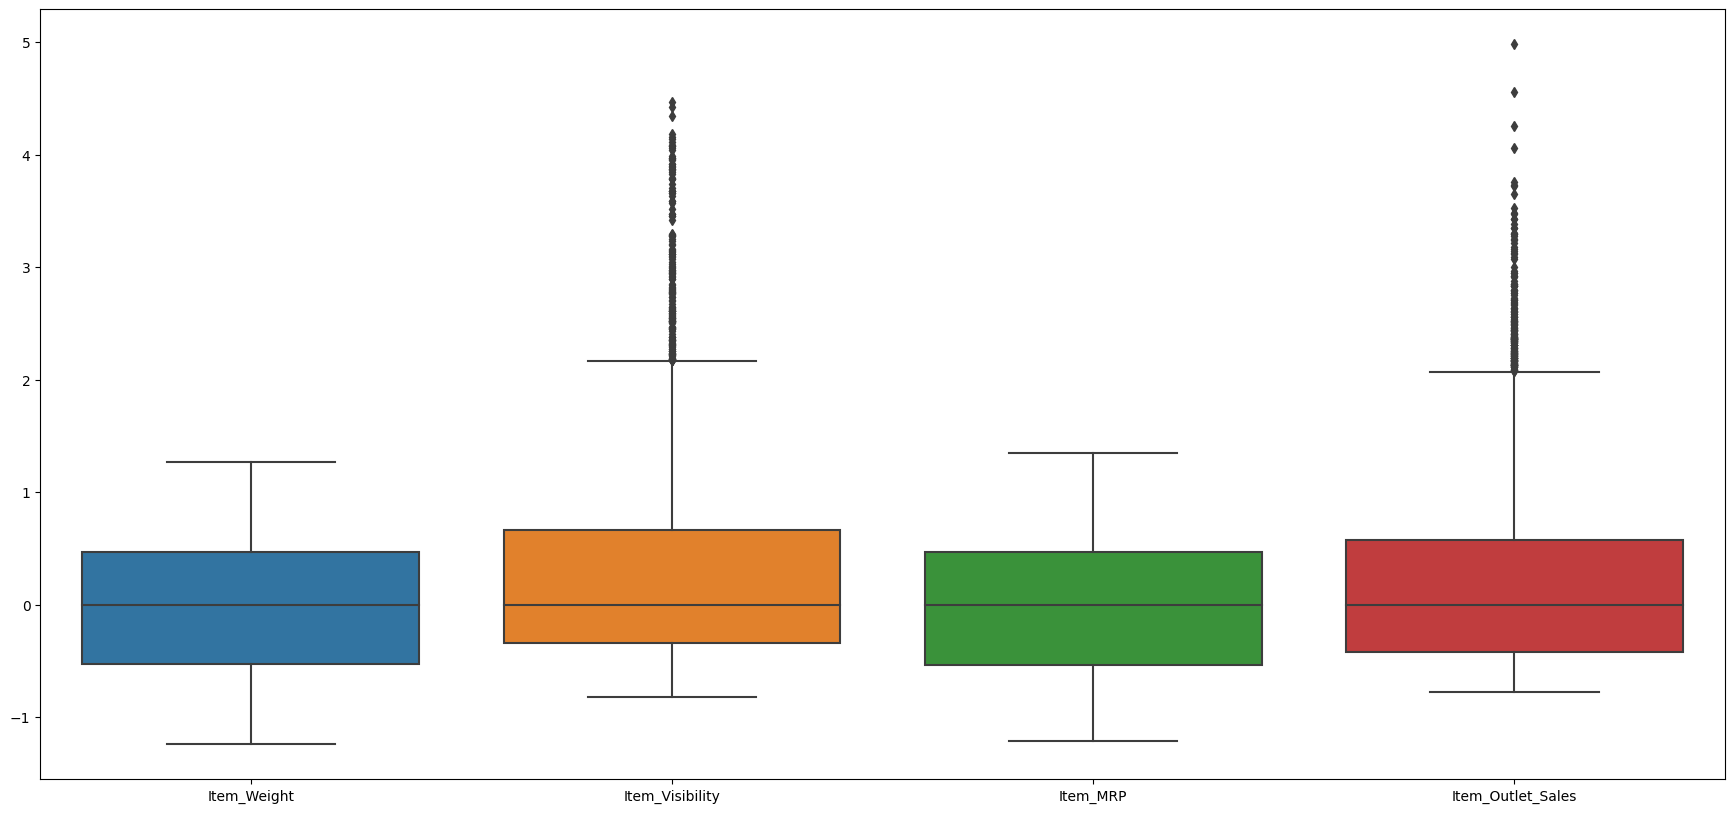

In [1038]:
plt.subplots(1,figsize=(100,10))
plt.subplot(141)
sns.boxplot(data3)
plt.show()

In [1039]:
import scipy.stats as stat
import pylab 

In [1040]:
df_n = df1.copy()

In [1041]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df_n,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df1[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df_n[feature],dist='norm',plot=pylab)
    plt.show()
    

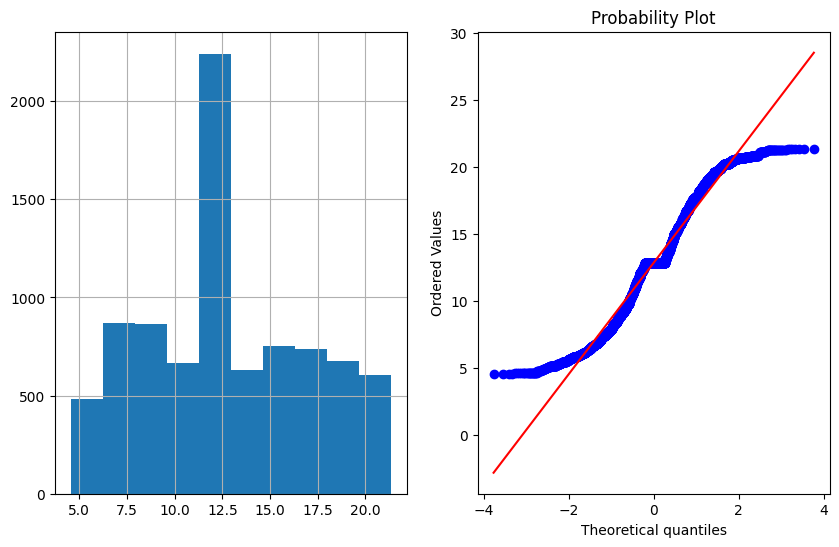

In [1042]:
plot_data(df_n,'Item_Weight')

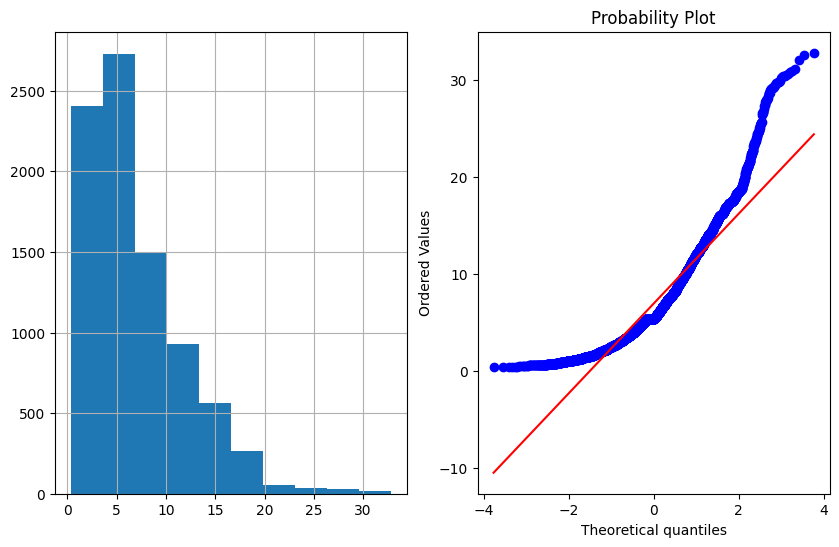

In [1043]:
plot_data(df_n,'Item_Visibility')

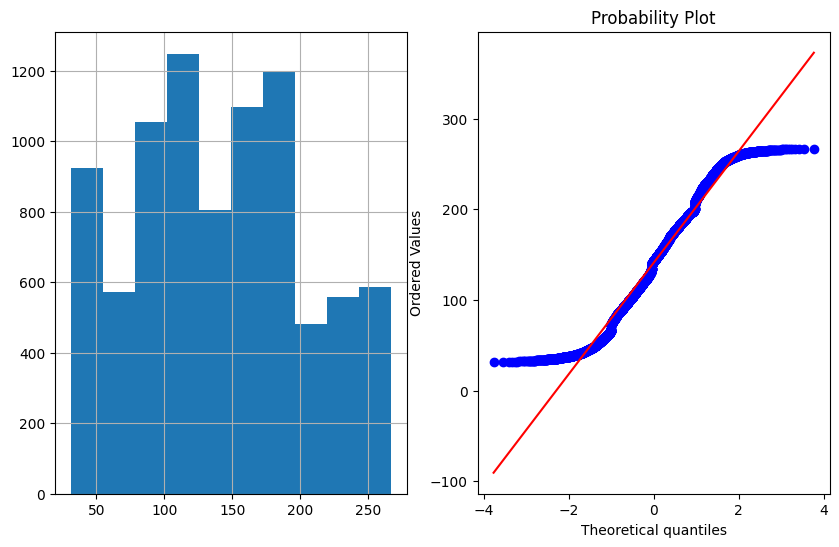

In [1044]:
plot_data(df_n,'Item_MRP')

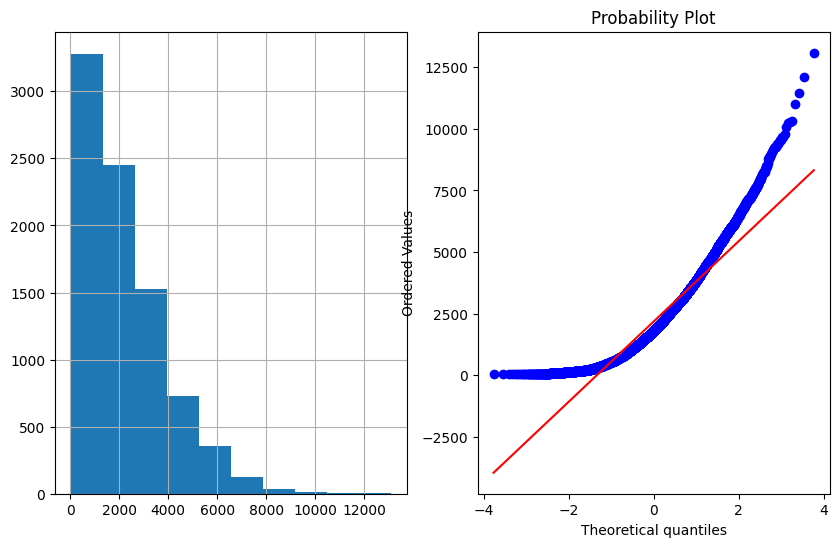

In [1045]:
plot_data(df_n,'Item_Outlet_Sales')

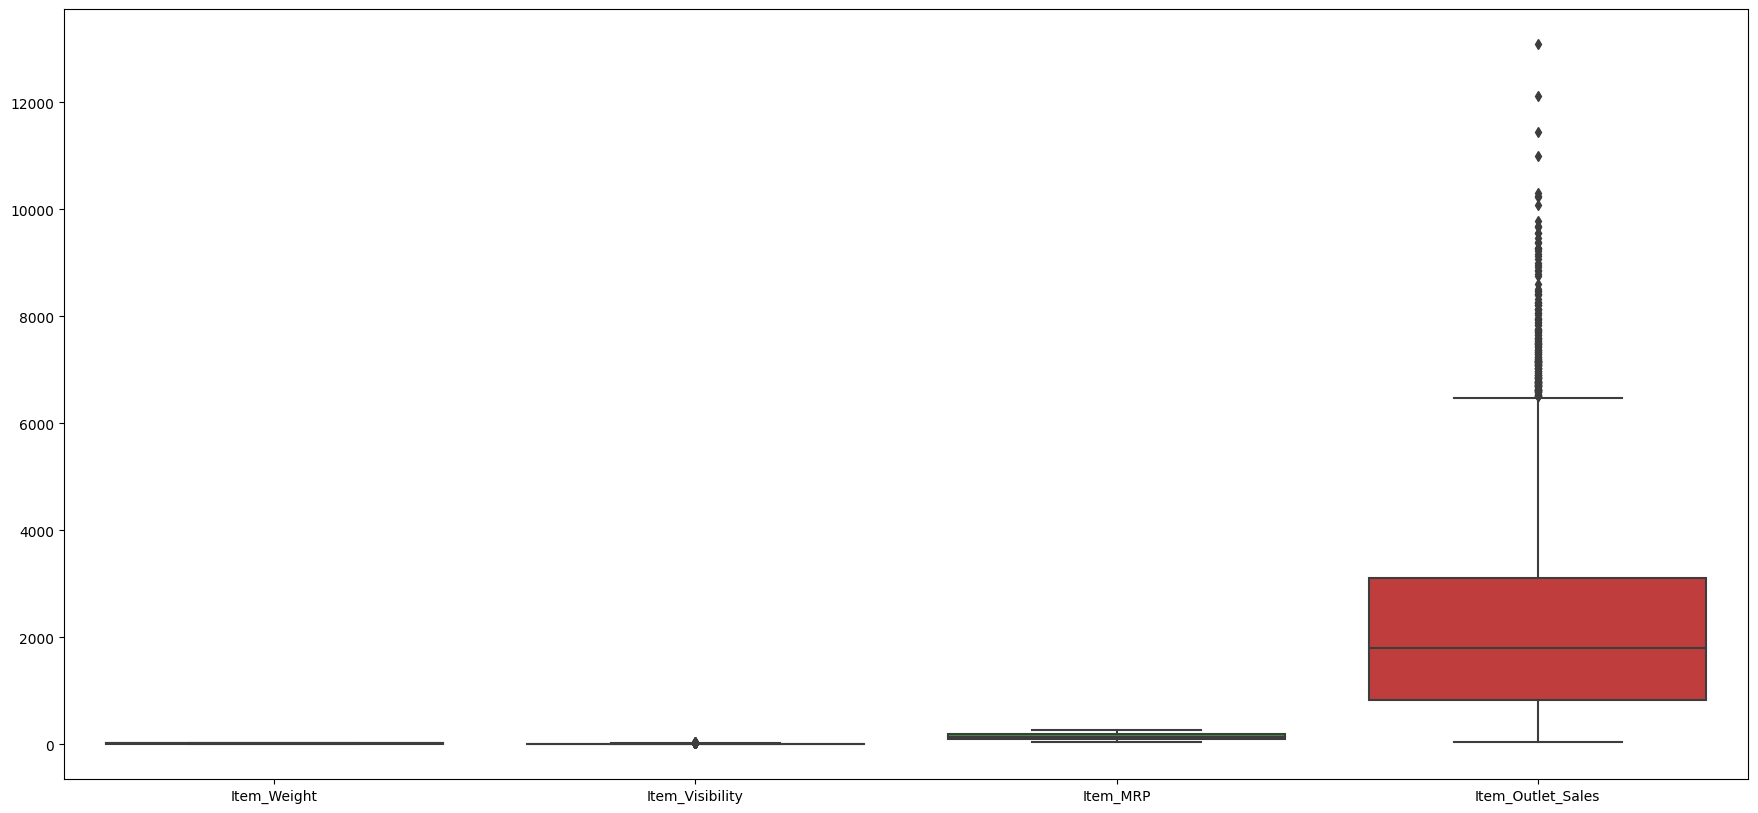

In [1046]:
plt.subplots(1,figsize=(100,10))
plt.subplot(141)
sns.boxplot(df_n)
plt.show()

## Logarithmic Transformation

In [1047]:
df_L = df1.copy()


In [1048]:
df_L

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,1.604730,249.8092,3735.1380
1,5.920,1.927822,48.2692,443.4228
2,17.500,1.676007,141.6180,2097.2700
3,19.200,5.393093,182.0950,732.3800
4,8.930,5.393093,53.8614,994.7052
...,...,...,...,...
8518,6.865,5.678339,214.5218,2778.3834
8519,8.380,4.698243,108.1570,549.2850
8520,10.600,3.518627,85.1224,1193.1136
8521,7.210,14.522065,103.1332,1845.5976


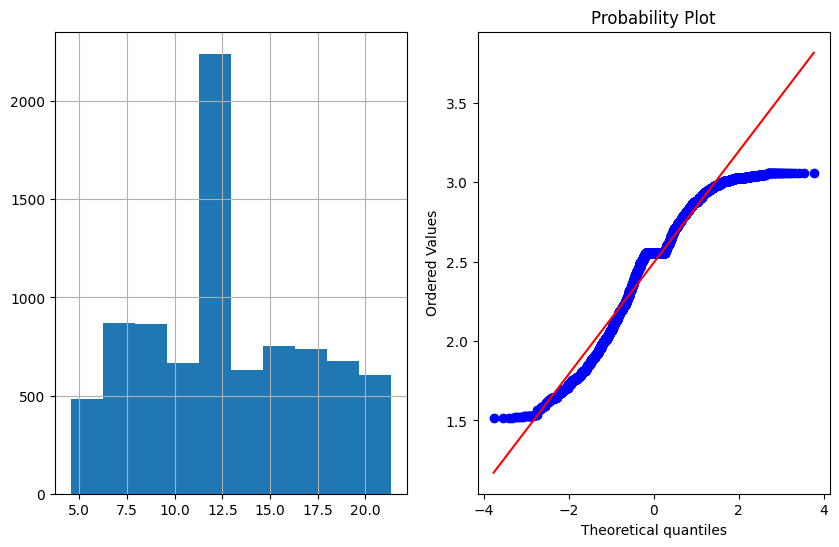

In [1049]:
import numpy as np
df_L['Item_Weight']=np.log(df_L['Item_Weight'])
plot_data(df_L,'Item_Weight')

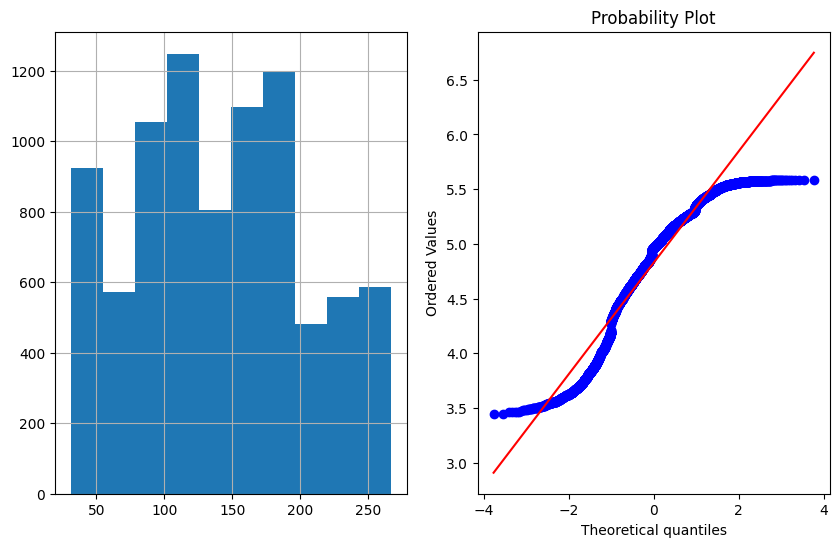

In [1050]:

df_L['Item_MRP']=np.log(df_L['Item_MRP'])
plot_data(df_L,'Item_MRP')

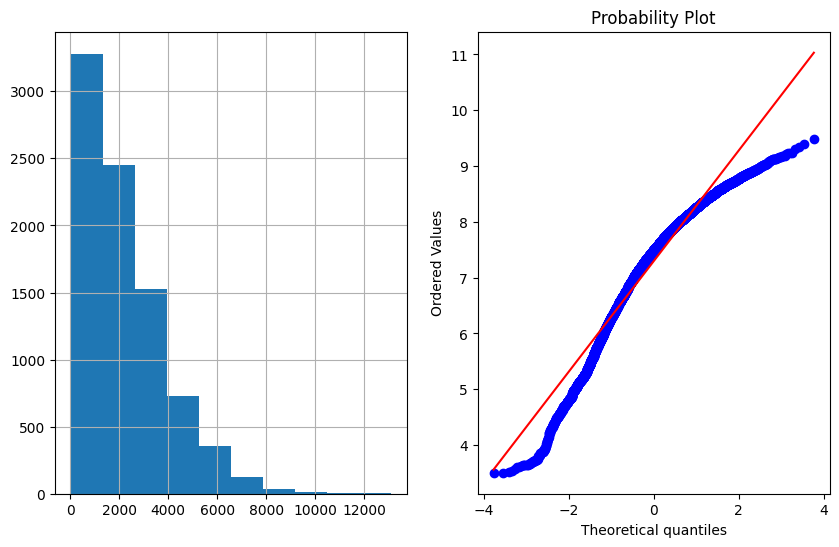

In [1051]:
df_L['Item_Outlet_Sales']=np.log(df_L['Item_Outlet_Sales'])
plot_data(df_L,'Item_Outlet_Sales')

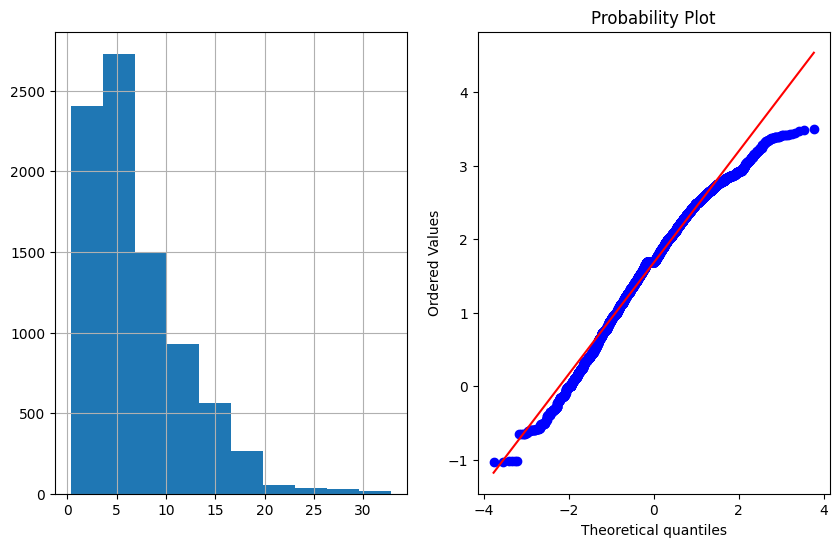

In [1052]:
df_L['Item_Visibility']=np.log(df_L['Item_Visibility'])
plot_data(df_L,'Item_Visibility')

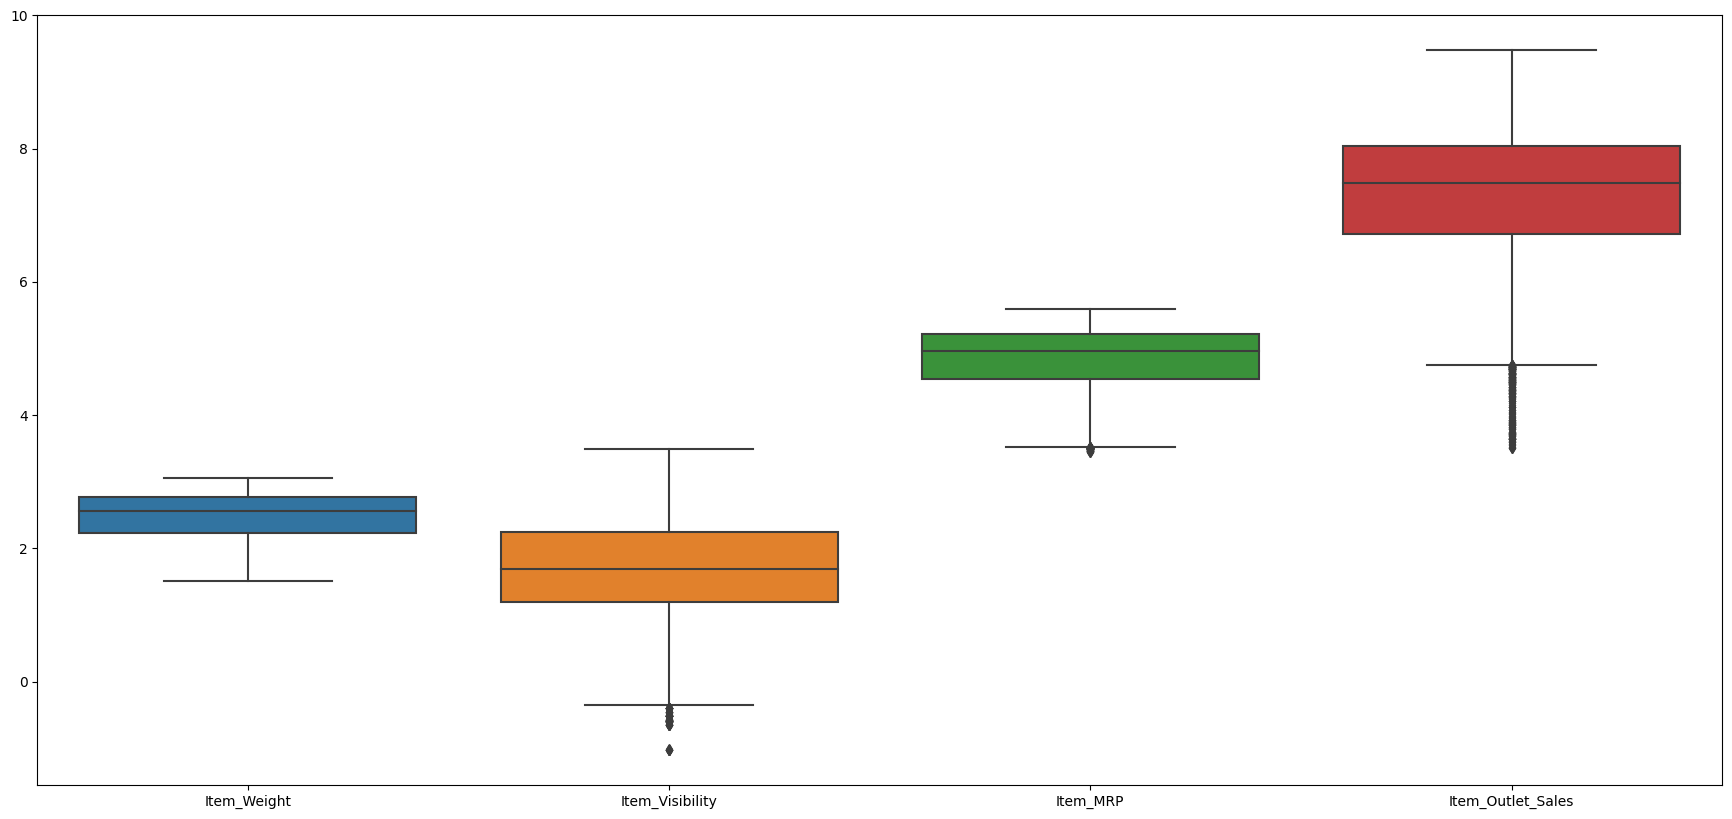

In [1053]:
plt.subplots(1,figsize=(100,10))
plt.subplot(141)
sns.boxplot(df_L)
plt.show()

## Reciprocal Trnasformation

In [1054]:
df_re = df1.copy()

In [1055]:
df_re

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,1.604730,249.8092,3735.1380
1,5.920,1.927822,48.2692,443.4228
2,17.500,1.676007,141.6180,2097.2700
3,19.200,5.393093,182.0950,732.3800
4,8.930,5.393093,53.8614,994.7052
...,...,...,...,...
8518,6.865,5.678339,214.5218,2778.3834
8519,8.380,4.698243,108.1570,549.2850
8520,10.600,3.518627,85.1224,1193.1136
8521,7.210,14.522065,103.1332,1845.5976


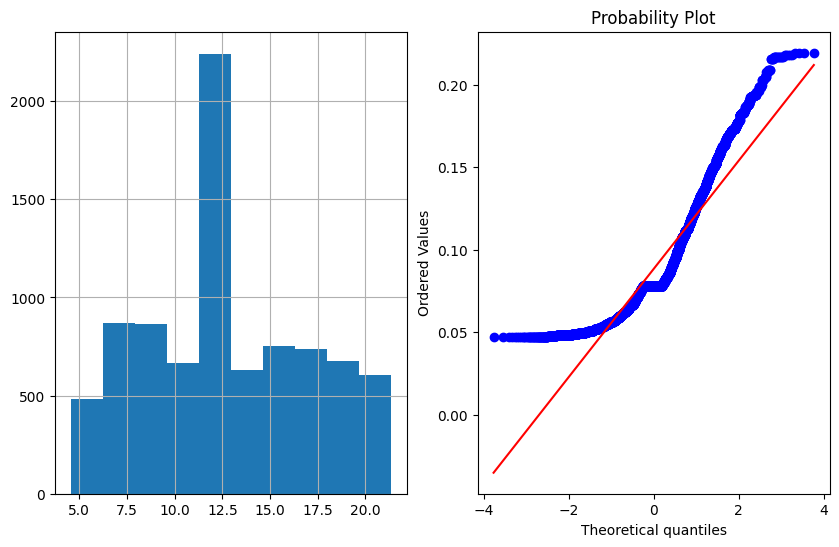

In [1056]:
df_re['Item_Weight']=1/df_re.Item_Weight
plot_data(df_re,'Item_Weight')

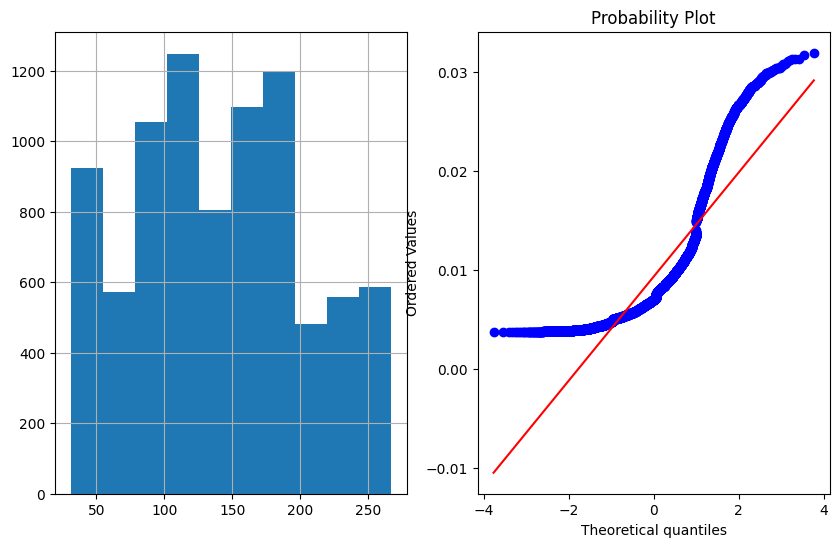

In [1057]:
df_re['Item_MRP']=1/df_re.Item_MRP
plot_data(df_re,'Item_MRP')

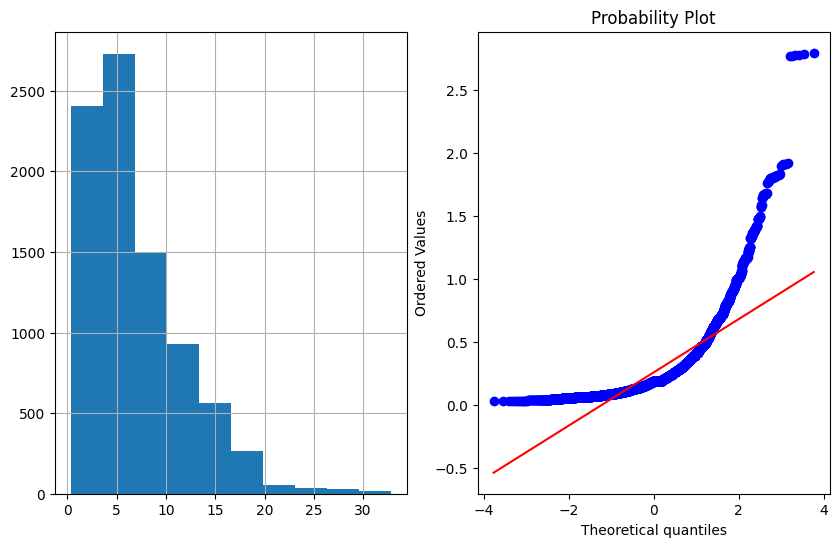

In [1058]:
df_re['Item_Visibility']=1/df_re.Item_Visibility
plot_data(df_re,'Item_Visibility')

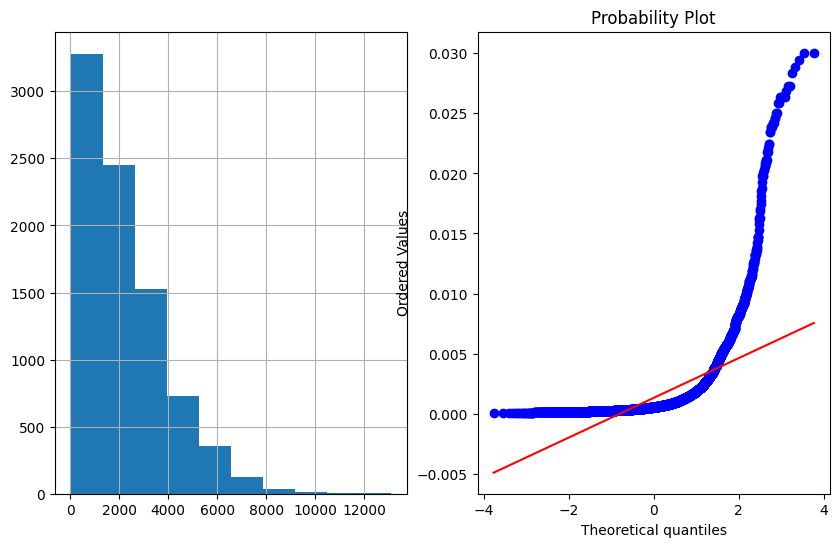

In [1059]:
df_re['Item_Outlet_Sales']=1/df_re.Item_Outlet_Sales
plot_data(df_re,'Item_Outlet_Sales')

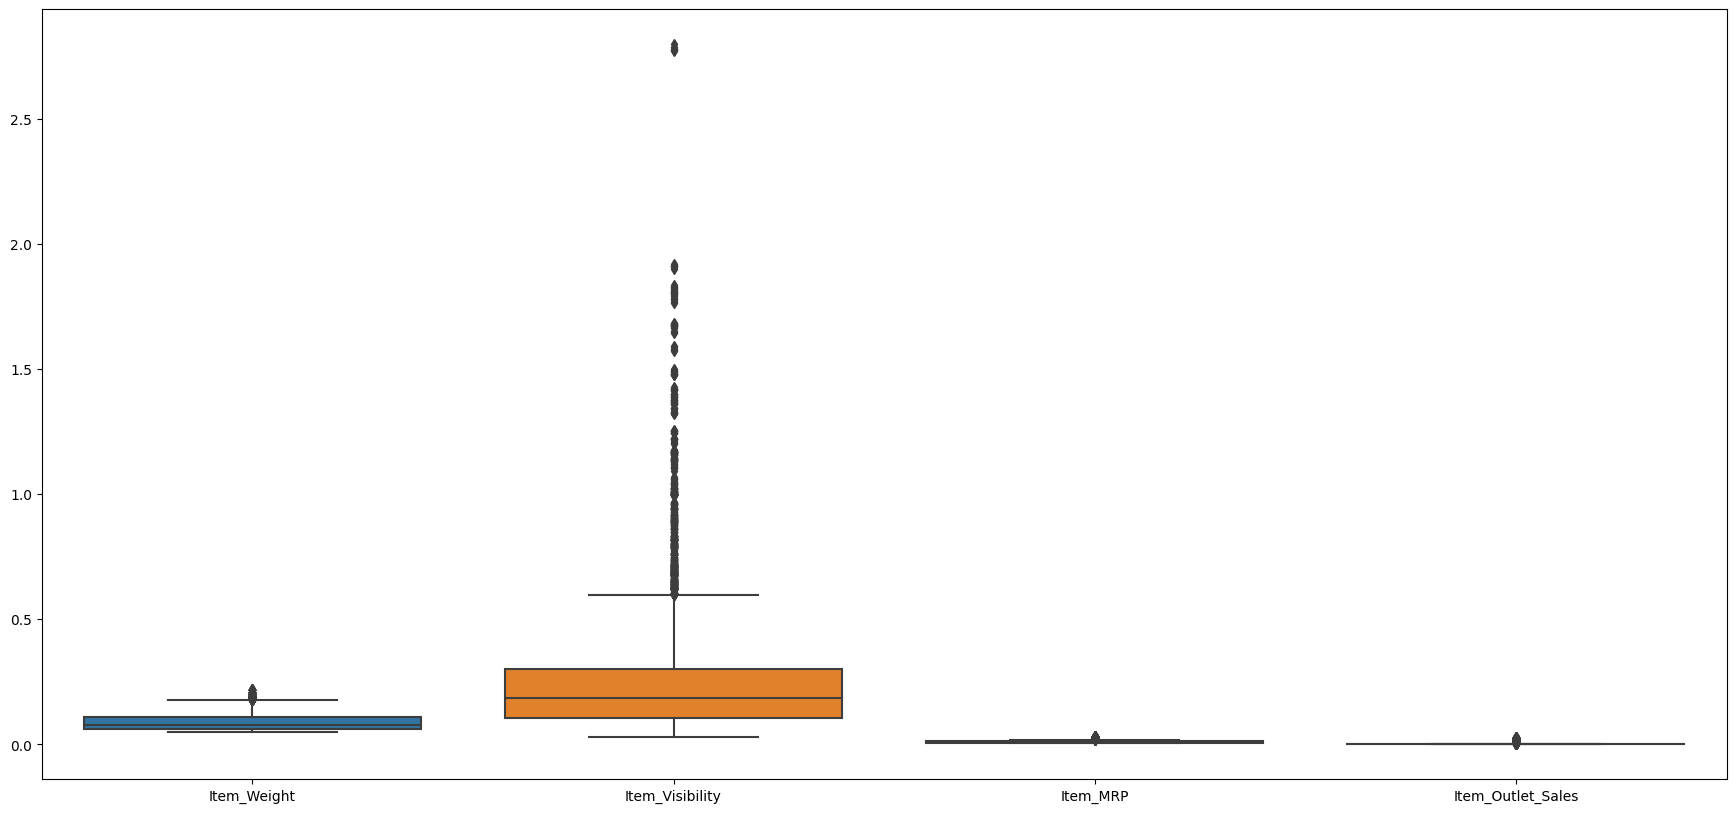

In [1060]:
plt.subplots(1,figsize=(100,10))
plt.subplot(141)
sns.boxplot(df_re)
plt.show()

## Square Root Transformation


In [1061]:
df_sr = df1.copy()

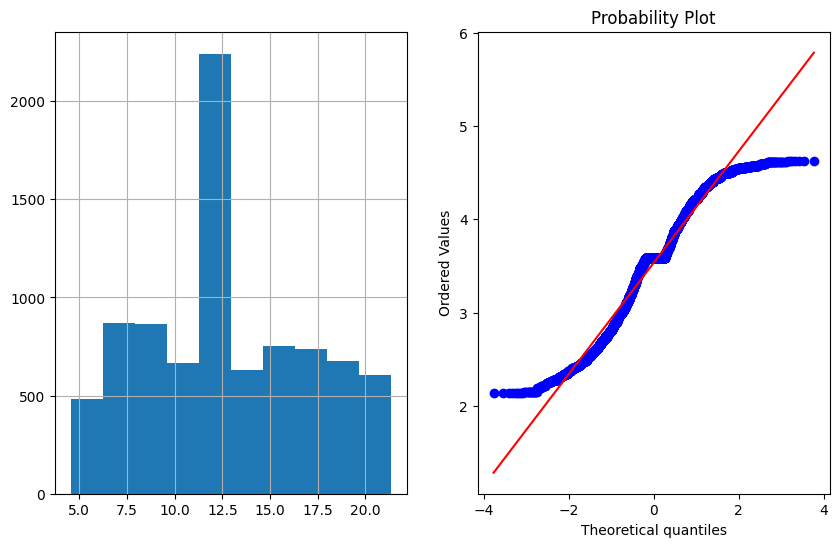

In [1062]:
df_sr['Item_Weight']=df_sr.Item_Weight**(1/2)
plot_data(df_sr,'Item_Weight')

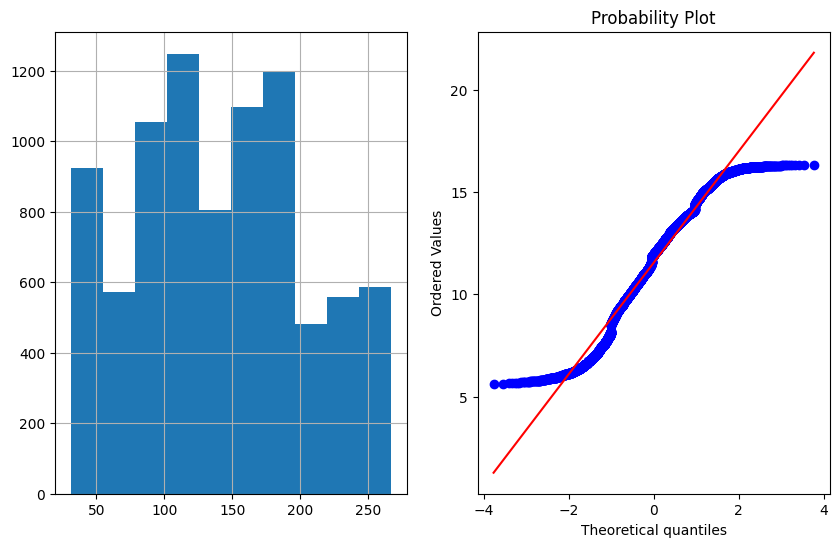

In [1063]:
df_sr['Item_MRP']=df_sr.Item_MRP**(1/2)
plot_data(df_sr,'Item_MRP')

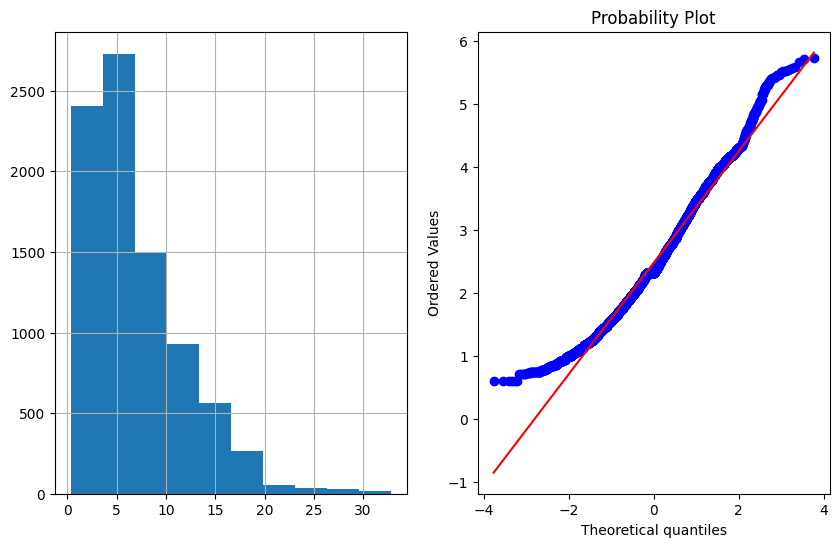

In [1064]:
df_sr['Item_Visibility']=df_sr.Item_Visibility**(1/2)
plot_data(df_sr,'Item_Visibility')

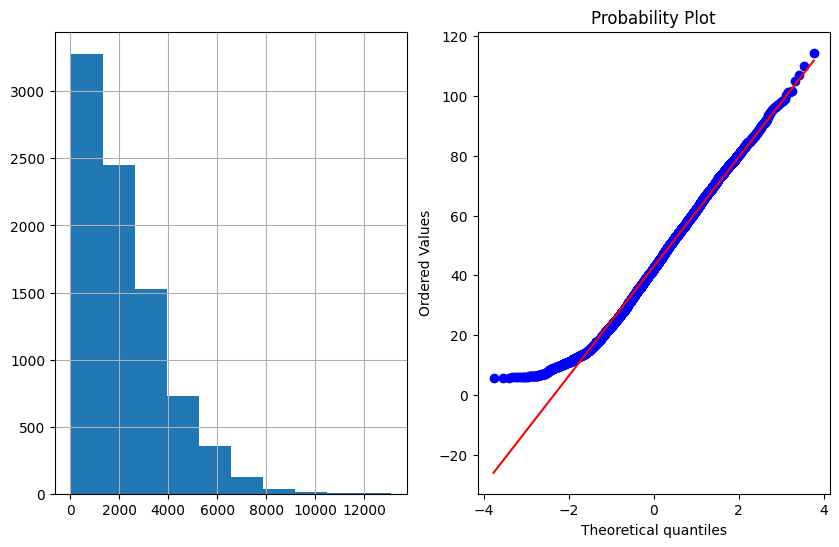

In [1065]:
df_sr['Item_Outlet_Sales']=df_sr.Item_Outlet_Sales**(1/2)
plot_data(df_sr,'Item_Outlet_Sales')

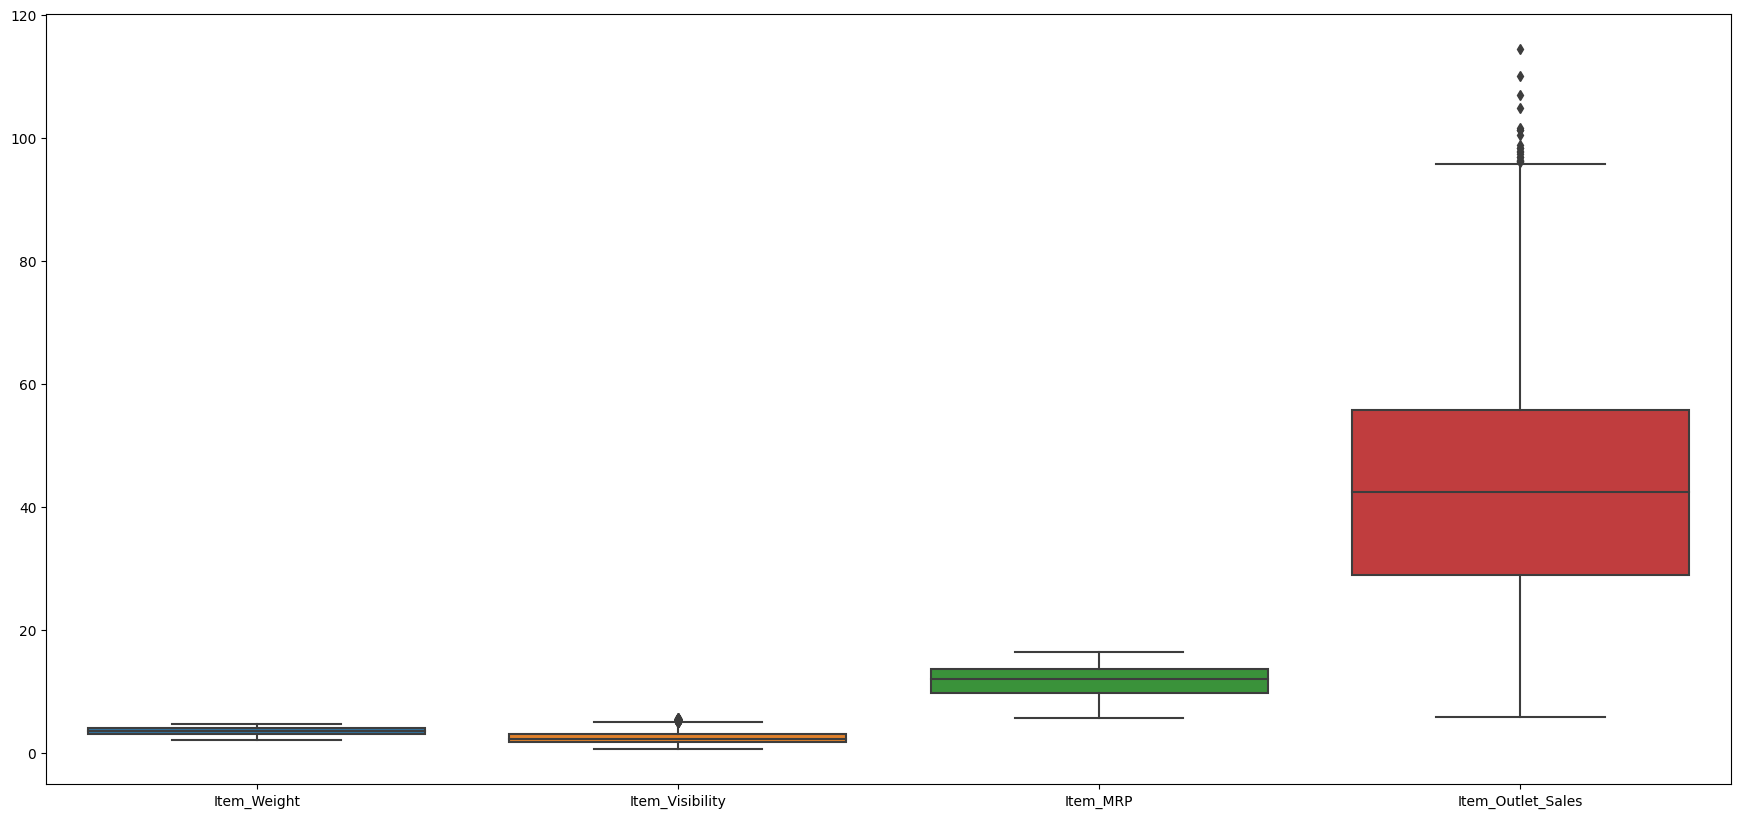

In [1066]:
plt.subplots(1,figsize=(100,10))
plt.subplot(141)
sns.boxplot(df_sr)
plt.show()

## Exponential Transformation


In [1067]:
df_exp = df1.copy()

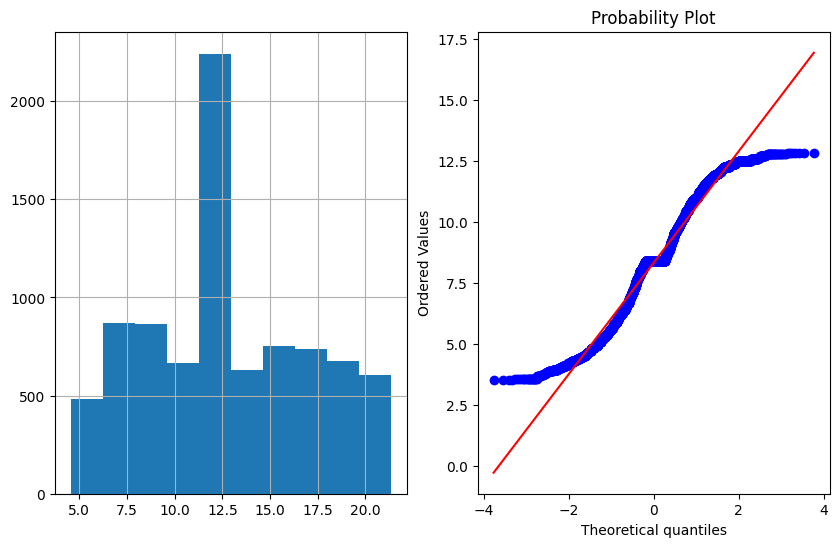

In [1068]:
df_exp['Item_Weight']=df_exp.Item_Weight**(1/1.2)
plot_data(df_exp,'Item_Weight')

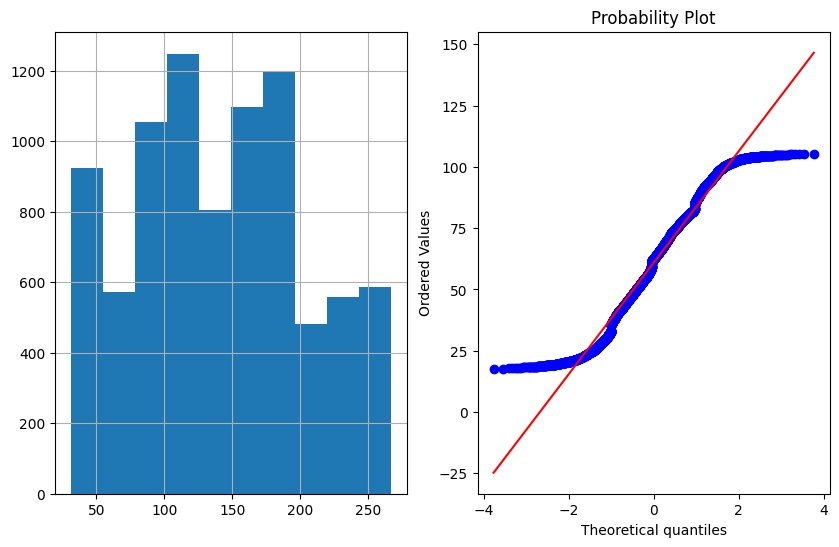

In [1069]:
df_exp['Item_MRP']=df_exp.Item_MRP**(1/1.2)
plot_data(df_exp,'Item_MRP')

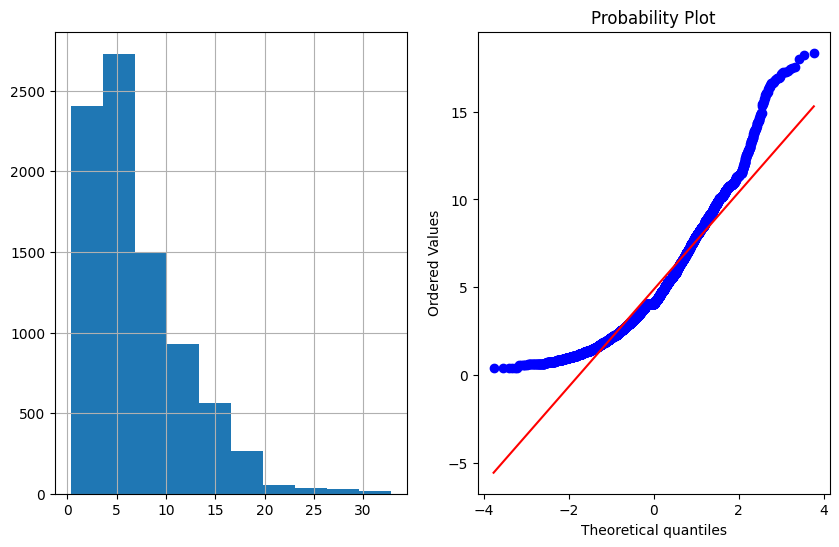

In [1070]:
df_exp['Item_Visibility']=df_exp.Item_Visibility**(1/1.2)
plot_data(df_exp,'Item_Visibility')

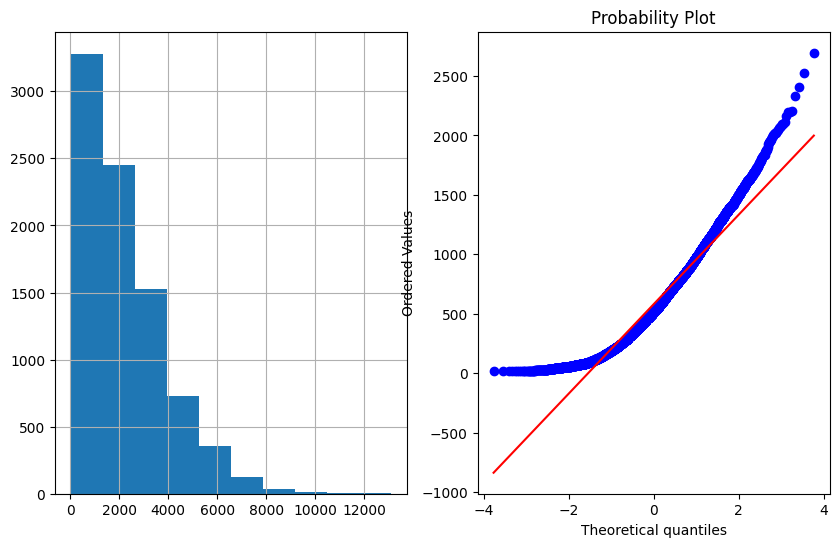

In [1071]:
df_exp['Item_Outlet_Sales']=df_exp.Item_Outlet_Sales**(1/1.2)
plot_data(df_exp,'Item_Outlet_Sales')

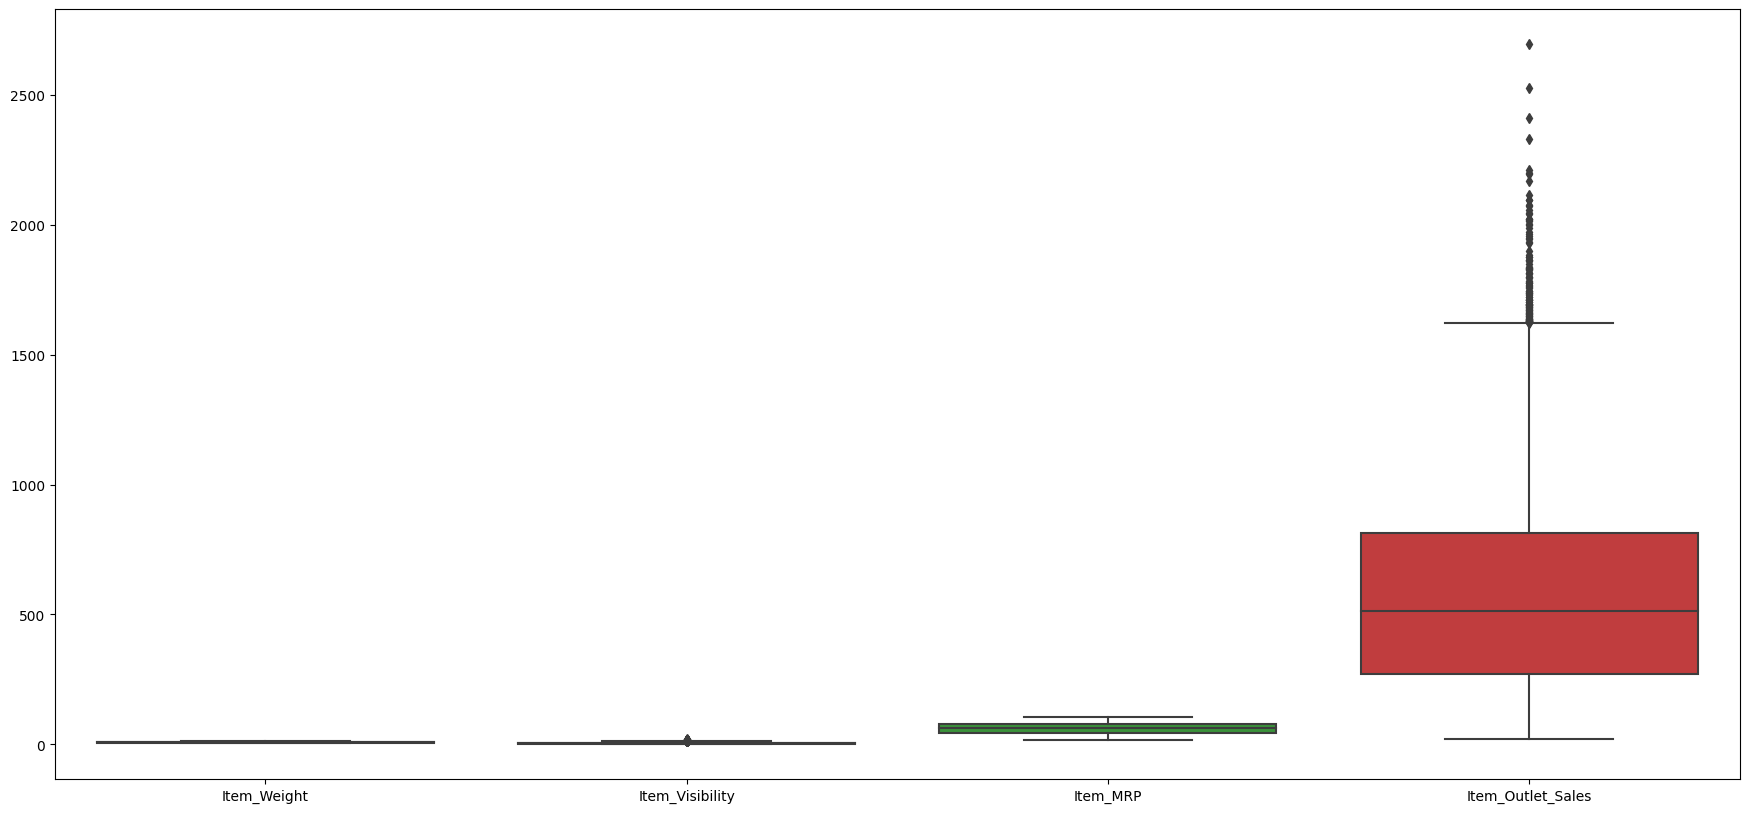

In [1072]:
plt.subplots(1,figsize=(100,10))
plt.subplot(141)
sns.boxplot(df_exp)
plt.show()

## BoxCOx Transformation


In [1073]:
df_box = df1.copy()

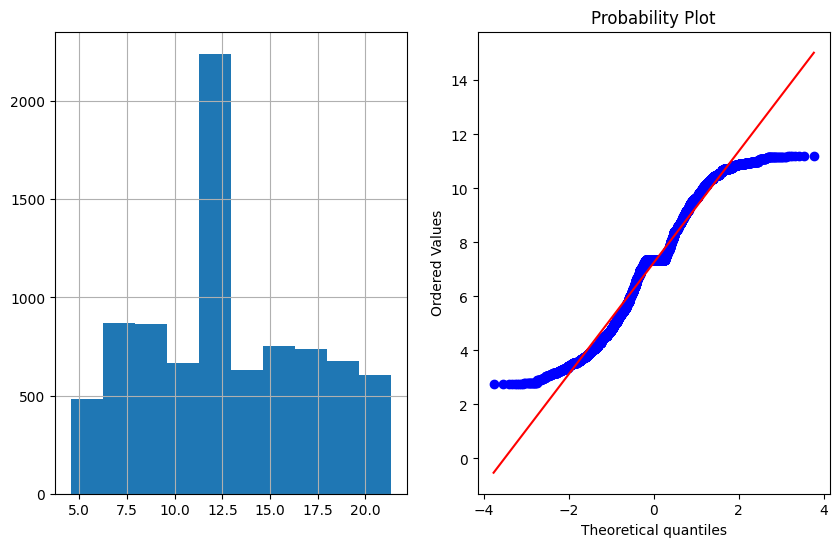

In [1074]:
df_box['Item_Weight'],parameters=stat.boxcox(df_box['Item_Weight'])
plot_data(df_box,'Item_Weight')

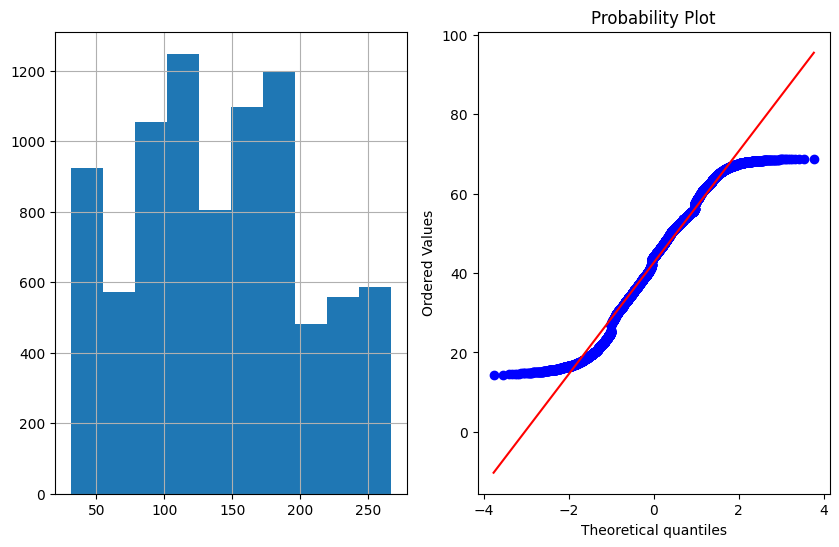

In [1075]:
df_box['Item_MRP'],parameters=stat.boxcox(df_box['Item_MRP'])
plot_data(df_box,'Item_MRP')

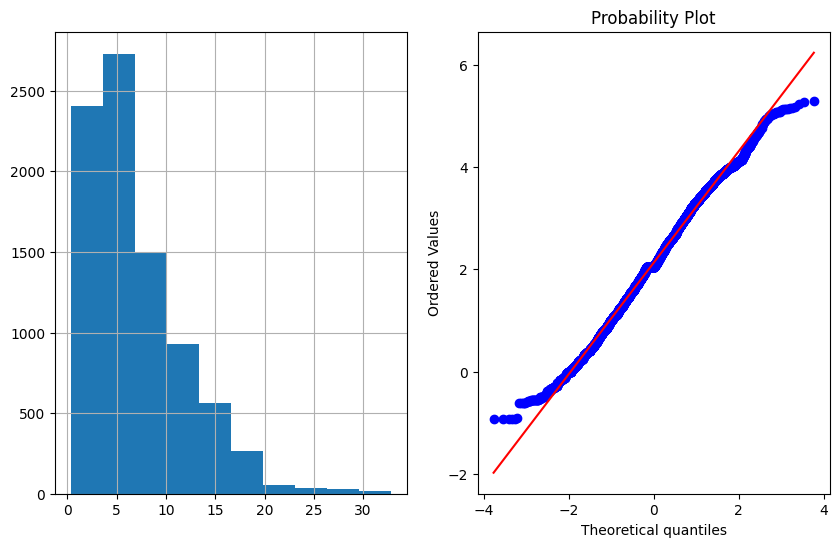

In [1076]:
df_box['Item_Visibility'],parameters=stat.boxcox(df_box['Item_Visibility'])
plot_data(df_box,'Item_Visibility')

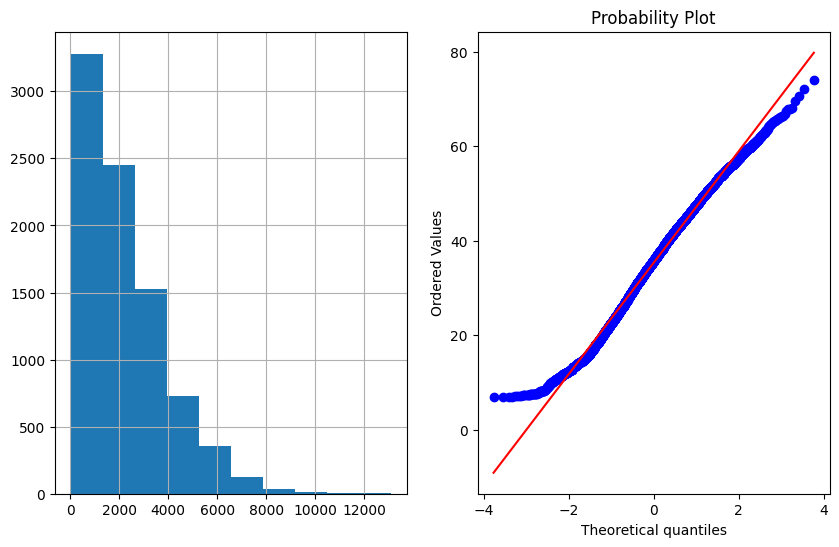

In [1077]:
df_box['Item_Outlet_Sales'],parameters=stat.boxcox(df_box['Item_Outlet_Sales'])
plot_data(df_box,'Item_Outlet_Sales')

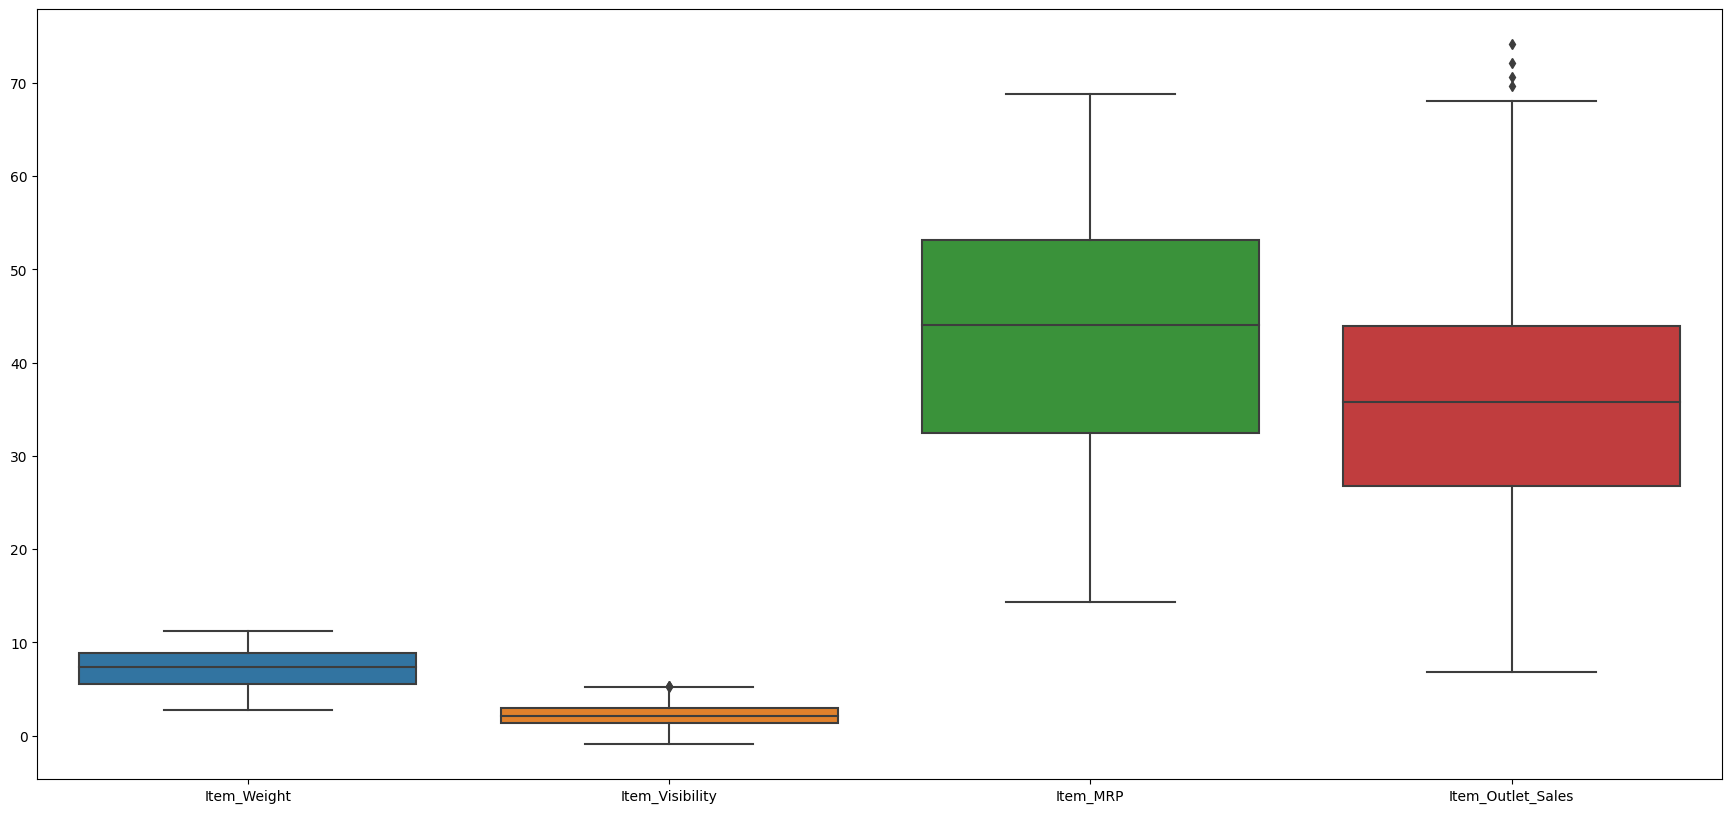

In [1078]:
plt.subplots(1,figsize=(100,10))
plt.subplot(141)
sns.boxplot(df_box)
plt.show()

## From the above transformation analysis, the boxcox tranformation is effective because after boxcox transforamtion the data has less outliers and approximately close to the normal distribution as compared to the other transformation techniques.

In [1079]:

Item_Weight_boxcox = stat.boxcox(df['Item_Weight'])

Item_Visibility_boxcox = stat.boxcox(df['Item_Visibility'])

Item_MRP_boxcox = stat.boxcox(df['Item_MRP'])

Item_Outlet_Sales_boxcox = stat.boxcox(df['Item_Outlet_Sales'])


In [1080]:
df['Item_Weight'] = pd.DataFrame(Item_Weight_boxcox[0])
df['Item_Visibility'] = pd.DataFrame(Item_Visibility_boxcox[0])
df['Item_MRP'] = pd.DataFrame(Item_MRP_boxcox[0])
df['Item_Outlet_Sales'] = pd.DataFrame(Item_Outlet_Sales_boxcox[0])

In [1081]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5.530264,Low Fat,0.498787,Dairy,65.652445,OUT049,1999,Medium,Tier 1,Supermarket Type1,47.007885
1,3.609073,Regular,0.706843,Soft Drinks,19.920687,OUT018,2009,Medium,Tier 3,Supermarket Type2,20.958294
2,9.519719,Low Fat,0.547313,Meat,43.751419,OUT049,1999,Medium,Tier 1,Supermarket Type1,37.964893
3,10.272881,Regular,2.045270,Fruits and Vegetables,52.395806,OUT010,1998,Medium,Tier 3,Grocery Store,25.485930
4,5.330906,Low Fat,2.045270,Household,21.614642,OUT013,1987,High,Tier 3,Supermarket Type1,28.660858
...,...,...,...,...,...,...,...,...,...,...,...
8518,4.171562,Low Fat,2.120740,Snack Foods,58.902813,OUT013,1987,High,Tier 3,Supermarket Type1,42.145847
8519,5.030226,Regular,1.847509,Baking Goods,36.018696,OUT045,2002,Medium,Tier 2,Supermarket Type1,22.794301
8520,6.213897,Low Fat,1.452196,Health and Hygiene,30.265789,OUT035,2004,Small,Tier 2,Supermarket Type1,30.712790
8521,4.371407,Regular,3.659056,Snack Foods,34.798598,OUT018,2009,Medium,Tier 3,Supermarket Type2,36.195026


In [1082]:
df_numerical = df.copy()

In [1083]:
df_numerical

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5.530264,Low Fat,0.498787,Dairy,65.652445,OUT049,1999,Medium,Tier 1,Supermarket Type1,47.007885
1,3.609073,Regular,0.706843,Soft Drinks,19.920687,OUT018,2009,Medium,Tier 3,Supermarket Type2,20.958294
2,9.519719,Low Fat,0.547313,Meat,43.751419,OUT049,1999,Medium,Tier 1,Supermarket Type1,37.964893
3,10.272881,Regular,2.045270,Fruits and Vegetables,52.395806,OUT010,1998,Medium,Tier 3,Grocery Store,25.485930
4,5.330906,Low Fat,2.045270,Household,21.614642,OUT013,1987,High,Tier 3,Supermarket Type1,28.660858
...,...,...,...,...,...,...,...,...,...,...,...
8518,4.171562,Low Fat,2.120740,Snack Foods,58.902813,OUT013,1987,High,Tier 3,Supermarket Type1,42.145847
8519,5.030226,Regular,1.847509,Baking Goods,36.018696,OUT045,2002,Medium,Tier 2,Supermarket Type1,22.794301
8520,6.213897,Low Fat,1.452196,Health and Hygiene,30.265789,OUT035,2004,Small,Tier 2,Supermarket Type1,30.712790
8521,4.371407,Regular,3.659056,Snack Foods,34.798598,OUT018,2009,Medium,Tier 3,Supermarket Type2,36.195026


In [1084]:
del df_numerical['Item_Fat_Content']
del df_numerical['Item_Type']
del df_numerical['Outlet_Establishment_Year']
del df_numerical['Outlet_Size']
del df_numerical['Outlet_Location_Type']
del df_numerical['Outlet_Type']
del df_numerical['Outlet_Identifier']

In [1085]:
df_numerical

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,5.530264,0.498787,65.652445,47.007885
1,3.609073,0.706843,19.920687,20.958294
2,9.519719,0.547313,43.751419,37.964893
3,10.272881,2.045270,52.395806,25.485930
4,5.330906,2.045270,21.614642,28.660858
...,...,...,...,...
8518,4.171562,2.120740,58.902813,42.145847
8519,5.030226,1.847509,36.018696,22.794301
8520,6.213897,1.452196,30.265789,30.712790
8521,4.371407,3.659056,34.798598,36.195026


## Onehotencoding with many categories in a feature


In [1086]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5.530264,Low Fat,0.498787,Dairy,65.652445,OUT049,1999,Medium,Tier 1,Supermarket Type1,47.007885
1,3.609073,Regular,0.706843,Soft Drinks,19.920687,OUT018,2009,Medium,Tier 3,Supermarket Type2,20.958294
2,9.519719,Low Fat,0.547313,Meat,43.751419,OUT049,1999,Medium,Tier 1,Supermarket Type1,37.964893
3,10.272881,Regular,2.045270,Fruits and Vegetables,52.395806,OUT010,1998,Medium,Tier 3,Grocery Store,25.485930
4,5.330906,Low Fat,2.045270,Household,21.614642,OUT013,1987,High,Tier 3,Supermarket Type1,28.660858


In [1087]:
print("Categories in 'Item_Fat_Content' variable:",end=" " )
print(df['Item_Fat_Content'].unique())

print("Categories in 'Item_Type' variable:",end=" ")
print(df['Item_Type'].unique())

print("Categories in'Outlet_Size' variable:",end=" " )
print(df['Outlet_Size'].unique())

print("Categories in 'Outlet_Location_Type' variable:",end=" " )
print(df['Outlet_Location_Type'].unique())

print("Categories in 'Outlet_Type' variable:",end=" " )
print(df['Outlet_Type'].unique())


Categories in 'Item_Fat_Content' variable: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Categories in 'Item_Type' variable: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Categories in'Outlet_Size' variable: ['Medium' 'High' 'Small']
Categories in 'Outlet_Location_Type' variable: ['Tier 1' 'Tier 3' 'Tier 2']
Categories in 'Outlet_Type' variable: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [1088]:
df = df.replace('low fat', 'Low Fat')
df = df.replace('LF', 'Low Fat')
df = df.replace('reg', 'Regular')



In [1089]:
df_onehot = df.copy()

In [1090]:
df_onehot

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5.530264,Low Fat,0.498787,Dairy,65.652445,OUT049,1999,Medium,Tier 1,Supermarket Type1,47.007885
1,3.609073,Regular,0.706843,Soft Drinks,19.920687,OUT018,2009,Medium,Tier 3,Supermarket Type2,20.958294
2,9.519719,Low Fat,0.547313,Meat,43.751419,OUT049,1999,Medium,Tier 1,Supermarket Type1,37.964893
3,10.272881,Regular,2.045270,Fruits and Vegetables,52.395806,OUT010,1998,Medium,Tier 3,Grocery Store,25.485930
4,5.330906,Low Fat,2.045270,Household,21.614642,OUT013,1987,High,Tier 3,Supermarket Type1,28.660858
...,...,...,...,...,...,...,...,...,...,...,...
8518,4.171562,Low Fat,2.120740,Snack Foods,58.902813,OUT013,1987,High,Tier 3,Supermarket Type1,42.145847
8519,5.030226,Regular,1.847509,Baking Goods,36.018696,OUT045,2002,Medium,Tier 2,Supermarket Type1,22.794301
8520,6.213897,Low Fat,1.452196,Health and Hygiene,30.265789,OUT035,2004,Small,Tier 2,Supermarket Type1,30.712790
8521,4.371407,Regular,3.659056,Snack Foods,34.798598,OUT018,2009,Medium,Tier 3,Supermarket Type2,36.195026


In [1091]:
del df_onehot['Item_Weight']

In [1092]:
del df_onehot['Item_Visibility']

del df_onehot['Item_MRP']

del df_onehot['Outlet_Establishment_Year']

del df_onehot['Item_Outlet_Sales']

In [1093]:
df_onehot

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [1094]:
for i in df_onehot.columns:
    print(i, ': ',len(df_onehot[i].unique()),'labels')

Item_Fat_Content :  2 labels
Item_Type :  16 labels
Outlet_Identifier :  10 labels
Outlet_Size :  3 labels
Outlet_Location_Type :  3 labels
Outlet_Type :  4 labels


In [1095]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):

# function to create the dummy variables for the most frequent labels # we can vary the number of most frequent Labels that we encode

 for label in top_x_labels: 
   df [variable+'_'+label] = np.where(data[variable]==label, 1, 0)

   

In [1096]:
top_10 = [x for x in df_onehot.Item_Fat_Content.value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df_onehot,'Item_Fat_Content',top_10)
df_onehot.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,1,0
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,0,1
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,1,0
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,0,1
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,1,0


In [1097]:
top_10 = [x for x in df_onehot.Item_Type.value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df_onehot,'Item_Type',top_10)
df_onehot.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Fruits and Vegetables,Item_Type_Snack Foods,Item_Type_Household,Item_Type_Frozen Foods,Item_Type_Dairy,Item_Type_Canned,Item_Type_Baking Goods,Item_Type_Health and Hygiene,Item_Type_Soft Drinks,Item_Type_Meat
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,0,0,1,0,0,0,0,0
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,0,1,0,0,0,0,0,0,0,0,1,0
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,0,0,0,0,0,0,0,1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,0,1,1,0,0,0,0,0,0,0,0,0
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,1,0,0,0,1,0,0,0,0,0,0,0


In [1098]:
top_10 = [x for x in df_onehot.Outlet_Identifier.value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df_onehot,'Outlet_Identifier',top_10)
df_onehot.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Fruits and Vegetables,Item_Type_Snack Foods,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT013,Outlet_Identifier_OUT049,Outlet_Identifier_OUT046,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT018,Outlet_Identifier_OUT017,Outlet_Identifier_OUT010,Outlet_Identifier_OUT019
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [1099]:
top_10 = [x for x in df_onehot.Outlet_Size.value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df_onehot,'Outlet_Size',top_10)
df_onehot.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Fruits and Vegetables,Item_Type_Snack Foods,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT018,Outlet_Identifier_OUT017,Outlet_Identifier_OUT010,Outlet_Identifier_OUT019,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1100]:
top_10 = [x for x in df_onehot.Outlet_Location_Type.value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df_onehot,'Outlet_Location_Type',top_10)
df_onehot.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Fruits and Vegetables,Item_Type_Snack Foods,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT017,Outlet_Identifier_OUT010,Outlet_Identifier_OUT019,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 1
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [1101]:
top_10 = [x for x in df_onehot.Outlet_Type.value_counts().sort_values(ascending=False).head(10).index]
top_10
one_hot_top_x(df_onehot,'Outlet_Type',top_10)
df_onehot.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Fruits and Vegetables,Item_Type_Snack Foods,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 1,Outlet_Type_Supermarket Type1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type2
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [1102]:
del df_onehot['Item_Fat_Content']

del df_onehot['Item_Type']

del df_onehot['Outlet_Identifier']

del df_onehot['Outlet_Size']

del df_onehot['Outlet_Location_Type']

del df_onehot['Outlet_Type']





In [1103]:
df_onehot

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Fruits and Vegetables,Item_Type_Snack Foods,Item_Type_Household,Item_Type_Frozen Foods,Item_Type_Dairy,Item_Type_Canned,Item_Type_Baking Goods,Item_Type_Health and Hygiene,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 1,Outlet_Type_Supermarket Type1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type2
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
8519,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
8520,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
8521,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [1104]:
data_transformed = pd.concat([df_numerical, df_onehot], axis = 1)


In [1105]:
data_transformed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Fruits and Vegetables,Item_Type_Snack Foods,Item_Type_Household,Item_Type_Frozen Foods,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 1,Outlet_Type_Supermarket Type1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type2
0,5.530264,0.498787,65.652445,47.007885,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,3.609073,0.706843,19.920687,20.958294,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,9.519719,0.547313,43.751419,37.964893,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,10.272881,2.045270,52.395806,25.485930,0,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,5.330906,2.045270,21.614642,28.660858,1,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,4.171562,2.120740,58.902813,42.145847,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
8519,5.030226,1.847509,36.018696,22.794301,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
8520,6.213897,1.452196,30.265789,30.712790,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
8521,4.371407,3.659056,34.798598,36.195026,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
